### Selecting Features

This jupyter notebook will:
- converting data in the excel file to multiple dataframes
- cleaning data by dropping unnecessary features
- using correlation matrix to detect similar features and then drop them to reduce dimensionality
- merging tidied dataframes and then exporting it as a pickle file to do further analysis

In [1]:
# importing libraries and modules needed for feature selection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading nba data and transforming them back to dataframes
# due to the nubmer of characters restriction on excel spreadsheet naming, 'defense_dashboard_<_10ft_defense' is changed to 'defense_dashboard_<_10ft_defens'
nba_stats = pd.ExcelFile('nba_stats.xlsx')
df_list = ['general_traditional', 'general_advanced', 'defense_dashboard_overall', 'defense_dashboard_3pt_defense', 'defense_dashboard_<_6ft_defense', 'defense_dashboard_<_10ft_defens', 'defense_dashboard_>15ft_defense', 'hustle', 'shooting', 'playtype_isolation', 'playtype_pnr_ball_handler', 'playtype_pnr_roll_man', 'playtype_transition', 'playtype_post_up', 'playtype_spot_up', 'playtype_handoff', 'playtype_cut', 'playtype_off_screen', 'playtype_putback', 'tracking_passing']
dfs = [pd.read_excel(nba_stats, f"{df_name}") for df_name in df_list ]

In [3]:
# data scraped from nba api contains hidden data not shown on the website, which are unwanted or irrelevant, needed to be dropped first
# then use correlation matrix to cut down the number of variables

# general_traditional df
general_traditional = dfs[0]
general_traditional.drop(['Unnamed: 0', 'PLAYER_ID', 'NICKNAME', 'TEAM_ID', 
       'AGE', 'W', 'L', 'NBA_FANTASY_PTS', 'GP_RANK','W_RANK', 'L_RANK', 
       'W_PCT_RANK', 'MIN_RANK', 'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK', 
       'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK', 
       'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK', 'REB_RANK', 'AST_RANK', 
       'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK',
       'PFD_RANK', 'PTS_RANK', 'PLUS_MINUS_RANK', 'NBA_FANTASY_PTS_RANK',
       'DD2_RANK', 'TD3_RANK', 'CFID', 'CFPARAMS'], axis=1, inplace=True)
# limiting sample size by dropping inactive players
general_traditional = general_traditional[(general_traditional['MIN'] >= 12) & (general_traditional['GP'] >= 10)]
general_traditional.reset_index(drop=True, inplace=True)
general_traditional

,PLAYER_NAME,TEAM_ABBREVIATION,GP,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,...,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,DD2,TD3
0,Aaron Gordon,DEN,50,0.580,27.7,4.6,10.0,0.463,1.2,3.5,...,1.9,0.7,0.7,0.6,1.8,2.7,12.4,1.2,3,1
1,Aaron Holiday,IND,66,0.455,17.8,2.6,6.6,0.390,1.0,2.8,...,1.0,0.7,0.2,0.5,1.4,1.1,7.2,0.0,1,0
2,Aaron Nesmith,BOS,46,0.478,14.5,1.7,3.9,0.438,0.9,2.3,...,0.5,0.3,0.2,0.3,1.9,0.6,4.7,-0.2,0,0
3,Abdel Nader,PHX,24,0.667,14.8,2.4,4.8,0.491,0.8,1.8,...,0.8,0.4,0.4,0.3,1.4,1.5,6.7,1.2,0,0
4,Al Horford,BOS,28,0.393,27.9,5.8,12.9,0.450,2.0,5.4,...,1.0,0.9,0.9,0.4,1.7,1.2,14.2,-3.6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,Xavier Tillman,MEM,59,0.525,18.4,2.8,5.1,0.559,0.4,1.1,...,0.8,0.7,0.6,0.4,2.0,0.8,6.6,0.6,2,0
392,Yogi Ferrell,LAC,10,0.400,13.7,2.0,5.7,0.351,0.9,2.8,...,0.3,0.7,0.3,0.6,1.1,1.4,5.6,-0.1,0,0
393,Yuta Watanabe,TOR,50,0.480,14.5,1.6,3.6,0.439,0.7,1.8,...,0.4,0.5,0.4,0.2,1.1,0.7,4.4,-0.8,0,0
394,Zach LaVine,CHI,58,0.448,35.1,9.8,19.4,0.507,3.4,8.2,...,3.5,0.8,0.5,1.2,2.4,4.0,27.4,-0.2,3,0


<AxesSubplot:>

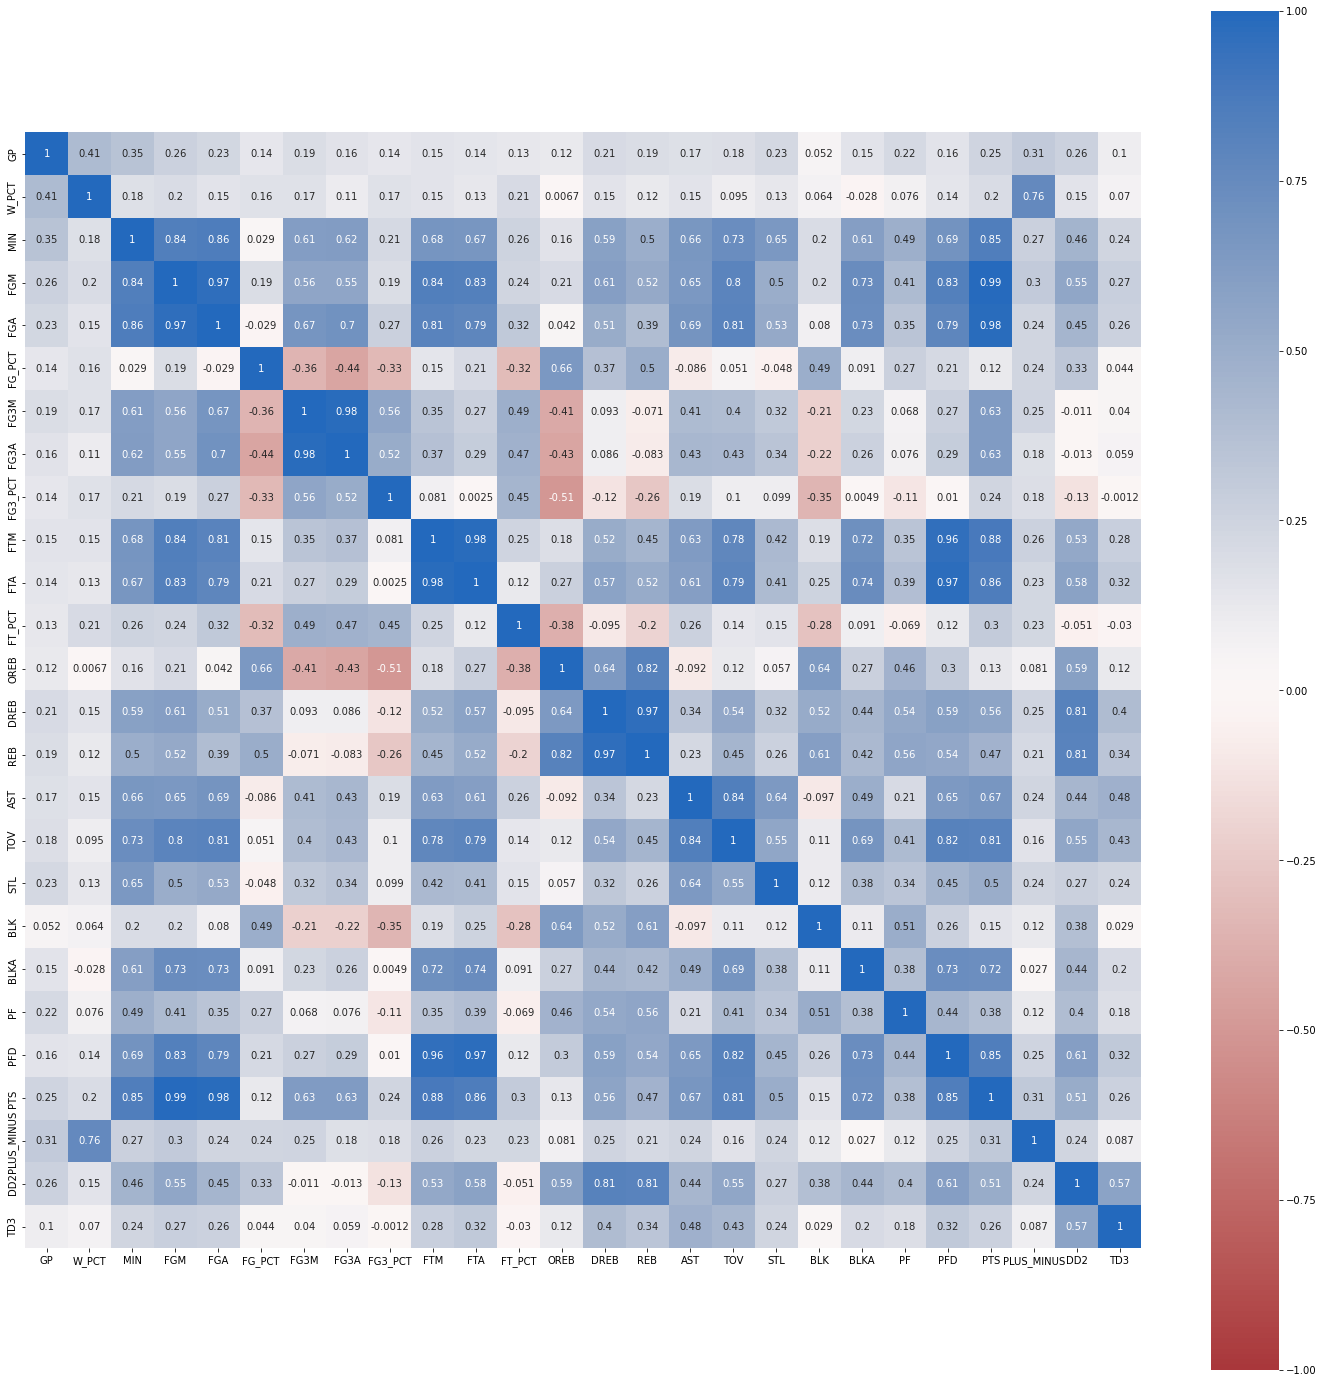

In [4]:
general_traditional_corr = general_traditional.corr()
plt.figure(figsize=(25,25))
sns.heatmap(general_traditional_corr, vmin=-1, vmax=1,center=0, cmap='vlag_r', square=True, annot=True)


In [5]:
general_traditional.drop(['GP', 'W_PCT', 'MIN', 'FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA', 'FT_PCT', 'REB', 'TOV', 'BLKA', 'PFD', 'DD2', 'TD3'], axis = 1, inplace = True)

/opt/miniconda3/envs/tf_python/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [6]:
# general_advanced df
general_advanced = dfs[1]
general_advanced.drop(['Unnamed: 0', 'PLAYER_ID', 'NICKNAME', 'TEAM_ID', 
       'AGE', 'GP', 'W', 'L', 'MIN', 'E_OFF_RATING', 
       'sp_work_OFF_RATING', 'E_DEF_RATING', 'sp_work_DEF_RATING', 'E_NET_RATING', 
       'sp_work_NET_RATING', 'E_TOV_PCT', 'E_USG_PCT', 'E_PACE', 'PACE_PER40', 'sp_work_PACE',
       'POSS', 'FGM', 'FGA', 'FGM_PG', 'FGA_PG', 'FG_PCT', 'GP_RANK',
       'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'E_OFF_RATING_RANK',
       'OFF_RATING_RANK', 'sp_work_OFF_RATING_RANK', 'E_DEF_RATING_RANK',
       'DEF_RATING_RANK', 'sp_work_DEF_RATING_RANK', 'E_NET_RATING_RANK',
       'NET_RATING_RANK', 'sp_work_NET_RATING_RANK', 'AST_PCT_RANK',
       'AST_TO_RANK', 'AST_RATIO_RANK', 'OREB_PCT_RANK', 'DREB_PCT_RANK',
       'REB_PCT_RANK', 'TM_TOV_PCT_RANK', 'E_TOV_PCT_RANK', 'EFG_PCT_RANK',
       'TS_PCT_RANK', 'USG_PCT_RANK', 'E_USG_PCT_RANK', 'E_PACE_RANK',
       'PACE_RANK', 'sp_work_PACE_RANK', 'PIE_RANK', 'FGM_RANK', 'FGA_RANK',
       'FGM_PG_RANK', 'FGA_PG_RANK', 'FG_PCT_RANK', 'CFID', 'CFPARAMS'], axis=1, inplace=True)
general_advanced

,PLAYER_NAME,TEAM_ABBREVIATION,W_PCT,OFF_RATING,DEF_RATING,NET_RATING,AST_PCT,AST_TO,AST_RATIO,OREB_PCT,DREB_PCT,REB_PCT,TM_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,PACE,PIE
0,Aaron Gordon,DEN,0.580,112.5,110.4,2.1,0.165,1.66,19.6,0.055,0.150,0.102,11.8,0.522,0.547,0.204,99.48,0.095
1,Aaron Holiday,IND,0.455,110.1,110.3,-0.2,0.139,1.86,18.5,0.012,0.060,0.036,9.9,0.467,0.503,0.189,104.34,0.057
2,Aaron Nesmith,BOS,0.478,108.6,109.1,-0.5,0.047,1.00,9.7,0.041,0.146,0.093,9.7,0.551,0.573,0.133,101.13,0.060
3,Abdel Nader,PHX,0.667,106.7,101.7,5.0,0.078,1.00,11.2,0.020,0.151,0.088,11.2,0.569,0.605,0.183,102.96,0.092
4,Adam Mokoka,CHI,0.214,83.2,90.3,-7.1,0.179,1.00,17.2,0.017,0.077,0.045,17.2,0.395,0.386,0.171,106.38,0.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,Yogi Ferrell,LAC,0.400,106.7,107.1,-0.4,0.229,7.33,25.9,0.034,0.095,0.065,3.5,0.430,0.459,0.193,99.17,0.094
536,Yuta Watanabe,TOR,0.480,105.0,107.8,-2.7,0.079,2.11,15.9,0.046,0.171,0.106,7.5,0.539,0.565,0.121,101.77,0.089
537,Zach LaVine,CHI,0.448,112.4,113.1,-0.8,0.225,1.39,16.3,0.018,0.121,0.071,11.7,0.596,0.634,0.302,101.34,0.140
538,Zeke Nnaji,DEN,0.714,102.0,112.5,-10.5,0.037,1.43,7.8,0.034,0.129,0.080,5.5,0.596,0.615,0.126,102.52,0.074


<AxesSubplot:>

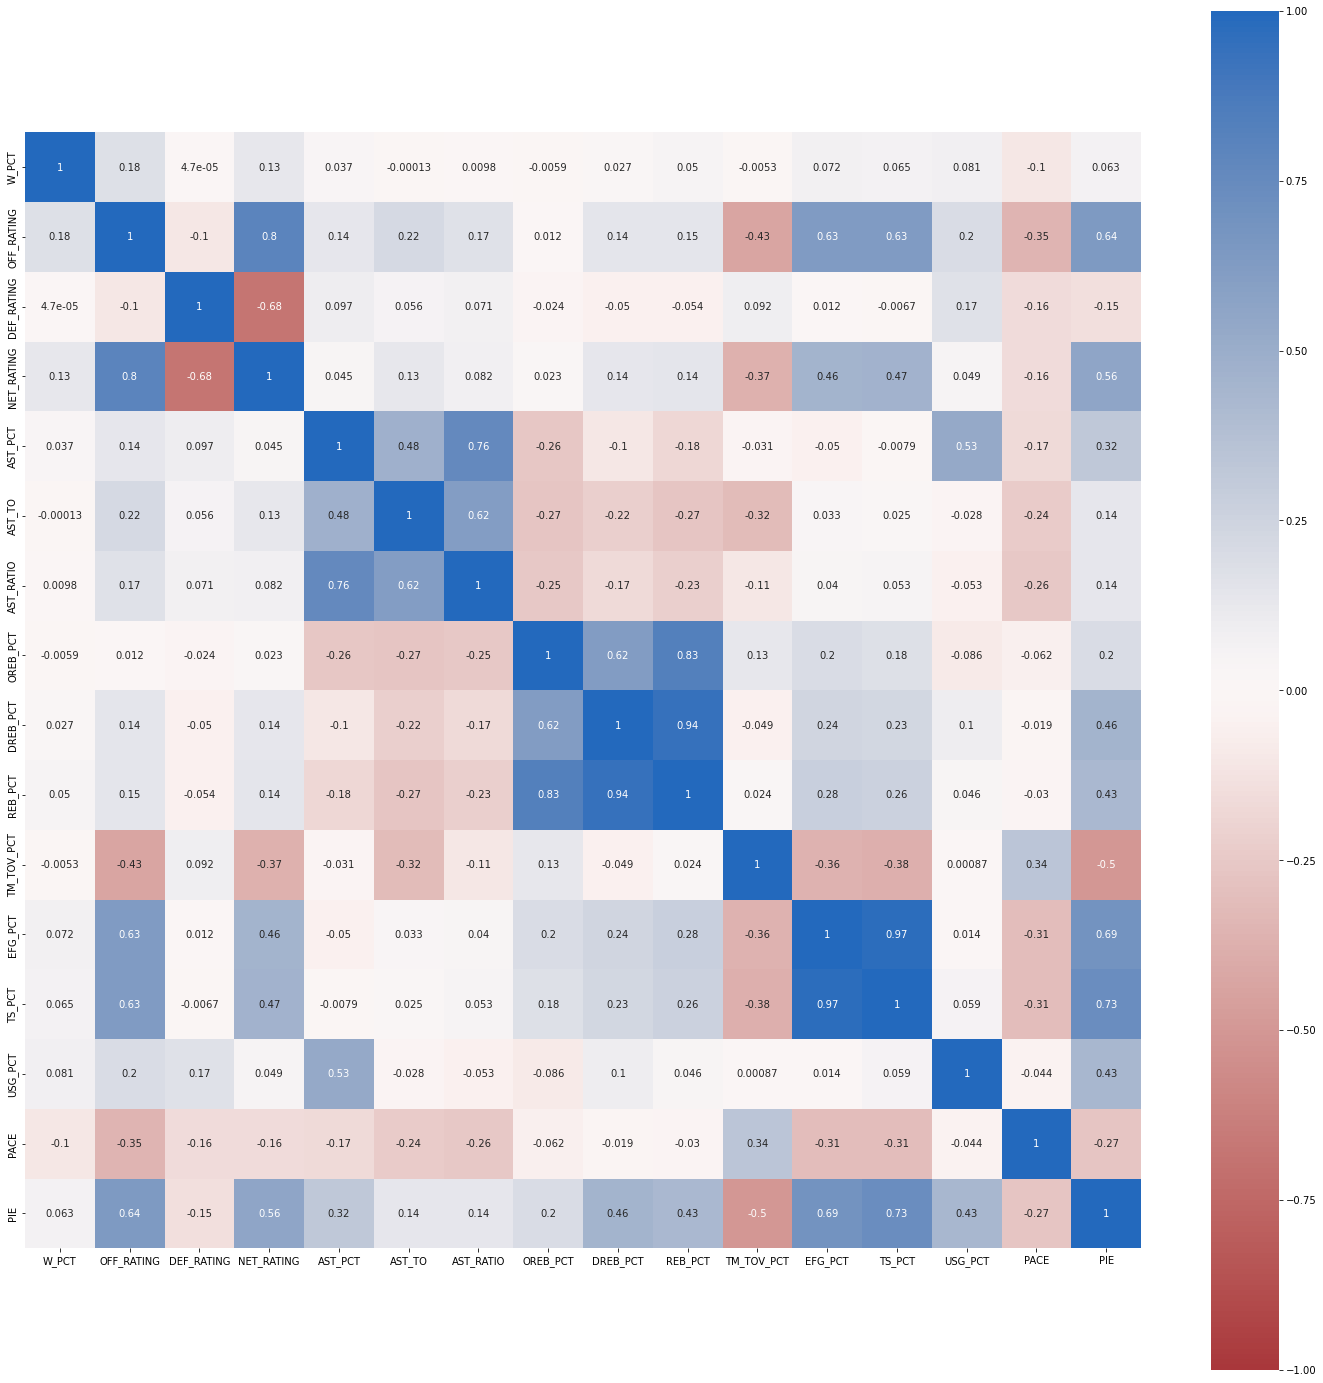

In [7]:
general_advanced_corr = general_advanced.corr()
plt.figure(figsize=(25,25))
sns.heatmap(general_advanced_corr, vmin=-1, vmax=1,center=0, cmap='vlag_r', square=True, annot=True)

In [8]:
general_advanced.drop(['W_PCT', 'OFF_RATING', 'DEF_RATING', 'NET_RATING', 'AST_RATIO', 'REB_PCT', 'EFG_PCT', 'PACE'], axis=1, inplace=True)

In [9]:
# defense_dashboard_overall df
defense_dashboard_overall = dfs[2]
defense_dashboard_overall.drop(['Unnamed: 0', 'CLOSE_DEF_PERSON_ID', 'PLAYER_LAST_TEAM_ID',], axis=1, inplace=True)
defense_dashboard_overall

,PLAYER_NAME,PLAYER_LAST_TEAM_ABBREVIATION,PLAYER_POSITION,AGE,GP,G,FREQ,D_FGM,D_FGA,D_FG_PCT,NORMAL_FG_PCT,PCT_PLUSMINUS
0,Rudy Gobert,UTA,C,29,71,71,1,9.21,22.30,0.413,0.493,-0.079
1,Brook Lopez,MIL,C,33,69,69,1,8.96,19.80,0.452,0.489,-0.036
2,Domantas Sabonis,IND,F-C,25,61,61,1,8.54,18.13,0.471,0.488,-0.017
3,Nikola Jokic,DEN,C,26,71,71,1,8.82,18.00,0.490,0.492,-0.002
4,Myles Turner,IND,C-F,25,46,46,1,8.07,17.85,0.452,0.493,-0.041
...,...,...,...,...,...,...,...,...,...,...,...,...
532,Theo Pinson,NYK,G-F,25,12,12,1,0.67,1.33,0.500,0.438,0.062
533,Keljin Blevins,POR,G,25,14,14,1,0.43,1.29,0.333,0.417,-0.084
534,Grant Riller,CHA,G,24,5,5,1,0.80,1.20,0.667,0.429,0.238
535,Robert Woodard II,SAC,F,21,7,7,1,0.57,1.14,0.500,0.505,-0.005


In [10]:
# defense_dashboard_3pt_defense df
defense_dashboard_3pt_defense = dfs[3]
defense_dashboard_3pt_defense.drop(['Unnamed: 0', 'CLOSE_DEF_PERSON_ID', 'PLAYER_LAST_TEAM_ID',], axis=1, inplace=True)
defense_dashboard_3pt_defense


,PLAYER_NAME,PLAYER_LAST_TEAM_ABBREVIATION,PLAYER_POSITION,AGE,GP,G,FREQ,FG3M,FG3A,FG3_PCT,NS_FG3_PCT,PLUSMINUS
0,Zion Williamson,NOP,F,20,59,59,0.454,2.20,6.29,0.350,0.364,-0.014
1,Pascal Siakam,TOR,F,27,56,56,0.402,2.59,6.29,0.412,0.368,0.044
2,Darius Bazley,OKC,F-G,21,54,54,0.410,2.13,6.15,0.346,0.365,-0.018
3,Shai Gilgeous-Alexander,OKC,G-F,22,34,34,0.417,2.12,6.12,0.346,0.368,-0.022
4,RJ Barrett,NYK,F-G,21,71,70,0.440,2.01,6.10,0.330,0.361,-0.031
...,...,...,...,...,...,...,...,...,...,...,...,...
529,Noah Vonleh,BKN,F,25,4,1,0.250,0.50,0.50,1.000,0.380,0.620
530,Udoka Azubuike,UTA,C-F,21,12,5,0.156,0.08,0.42,0.200,0.294,-0.094
531,Bruno Caboclo,HOU,F,25,5,2,0.077,0.00,0.40,0.000,0.358,-0.358
532,Terrance Ferguson,PHI,G,23,6,2,0.200,0.00,0.33,0.000,0.359,-0.359


In [11]:
# defense_dashboard_6ft_defense df
defense_dashboard__6ft_defense = dfs[4]
defense_dashboard__6ft_defense.drop(['Unnamed: 0', 'CLOSE_DEF_PERSON_ID', 'PLAYER_LAST_TEAM_ID',], axis=1, inplace=True)
defense_dashboard__6ft_defense


,PLAYER_NAME,PLAYER_LAST_TEAM_ABBREVIATION,PLAYER_POSITION,AGE,GP,G,FREQ,FGM_LT_06,FGA_LT_06,LT_06_PCT,NS_LT_06_PCT,PLUSMINUS
0,Myles Turner,IND,C-F,25,46,46,0.502,4.48,8.96,0.500,0.624,-0.124
1,Domantas Sabonis,IND,F-C,25,61,61,0.477,4.85,8.66,0.561,0.625,-0.064
2,Rudy Gobert,UTA,C,29,71,71,0.373,4.10,8.31,0.493,0.630,-0.136
3,Joel Embiid,PHI,C-F,27,51,51,0.466,4.63,8.12,0.570,0.623,-0.053
4,Jakob Poeltl,SAS,C,25,69,68,0.448,4.09,7.74,0.528,0.625,-0.097
...,...,...,...,...,...,...,...,...,...,...,...,...
530,Jared Harper,NYK,G,23,4,2,0.333,0.50,0.50,1.000,0.665,0.335
531,Noah Vonleh,BKN,F,25,4,2,0.250,0.50,0.50,1.000,0.562,0.439
532,Devon Dotson,CHI,G,21,7,2,0.176,0.00,0.43,0.000,0.653,-0.653
533,Grant Riller,CHA,G,24,5,2,0.333,0.40,0.40,1.000,0.591,0.409


In [12]:
# defense_dashboard_10ft_defense df
defense_dashboard_10ft_defens = dfs[5]
defense_dashboard_10ft_defens.drop(['Unnamed: 0', 'CLOSE_DEF_PERSON_ID', 'PLAYER_LAST_TEAM_ID',], axis=1, inplace=True)
defense_dashboard_10ft_defens

,PLAYER_NAME,PLAYER_LAST_TEAM_ABBREVIATION,PLAYER_POSITION,AGE,GP,G,FREQ,FGM_LT_10,FGA_LT_10,LT_10_PCT,NS_LT_10_PCT,PLUSMINUS
0,Rudy Gobert,UTA,C,29,71,71,0.488,5.06,10.87,0.465,0.591,-0.126
1,Domantas Sabonis,IND,F-C,25,61,61,0.590,5.79,10.69,0.541,0.587,-0.046
2,Myles Turner,IND,C-F,25,46,46,0.596,5.13,10.63,0.483,0.586,-0.103
3,Jakob Poeltl,SAS,C,25,69,68,0.553,4.75,9.57,0.497,0.585,-0.088
4,Nikola Jokic,DEN,C,26,71,71,0.527,5.42,9.48,0.572,0.587,-0.015
...,...,...,...,...,...,...,...,...,...,...,...,...
531,Noah Vonleh,BKN,F,25,4,2,0.250,0.50,0.50,1.000,0.546,0.454
532,Jared Harper,NYK,G,23,4,2,0.333,0.50,0.50,1.000,0.650,0.351
533,Keljin Blevins,POR,G,25,14,6,0.333,0.21,0.43,0.500,0.596,-0.096
534,Grant Riller,CHA,G,24,5,2,0.333,0.40,0.40,1.000,0.556,0.445


In [13]:
# defense_dashboard_15ft_defense df
defense_dashboard_15ft_defense = dfs[6]
defense_dashboard_15ft_defense.drop(['Unnamed: 0', 'CLOSE_DEF_PERSON_ID', 'PLAYER_LAST_TEAM_ID',], axis=1, inplace=True)
defense_dashboard_15ft_defense

,PLAYER_NAME,PLAYER_LAST_TEAM_ABBREVIATION,PLAYER_POSITION,AGE,GP,G,FREQ,FGM_GT_15,FGA_GT_15,GT_15_PCT,NS_GT_15_PCT,PLUSMINUS
0,Rudy Gobert,UTA,C,29,71,71,0.374,2.87,8.34,0.345,0.377,-0.033
1,Brook Lopez,MIL,C,33,69,69,0.406,3.28,8.04,0.407,0.373,0.034
2,Christian Wood,HOU,F,25,41,41,0.443,3.10,7.73,0.401,0.383,0.018
3,Darius Bazley,OKC,F-G,21,54,54,0.504,2.63,7.56,0.348,0.370,-0.022
4,Shai Gilgeous-Alexander,OKC,G-F,22,34,34,0.505,2.82,7.41,0.381,0.376,0.005
...,...,...,...,...,...,...,...,...,...,...,...,...
531,Jaylen Adams,MIL,G,25,2,1,0.250,0.00,0.50,0.000,0.382,-0.382
532,Jalen Lecque,IND,G,21,4,2,0.333,0.00,0.50,0.000,0.397,-0.397
533,Iman Shumpert,BKN,G,31,2,1,0.250,0.00,0.50,0.000,0.355,-0.355
534,Terrance Ferguson,PHI,G,23,6,2,0.200,0.00,0.33,0.000,0.369,-0.369


In [14]:
# as defense area are overlapped, so as the statistics
# we have to merge the defense dataframes and dissect the defense area through calculations

# renaming and dropping duplicate columns helps merging
defense_dashboard_overall.drop(['GP', 'G'], axis=1, inplace=True)
defense_dashboard_overall.rename(
    {
        'FREQ': 'OVERALL_FREQ',
        'D_FGM': 'OVERALL_DFGM',
        'D_FGA': 'OVERALL_DFGA',
        'D_FG_PCT': 'OVERALL_DFG%',
        'NORMAL_FG_PCT': 'OVERALL_FG%',
        'PCT_PLUSMINUS': 'OVERALL_%DIFF'
    }, axis=1, inplace=True
)

defense_dashboard__6ft_defense.drop(['GP', 'G'], axis=1, inplace=True)
defense_dashboard__6ft_defense.rename(
    {
        'FREQ': 'LT6FT_FREQ',
        'FGM_LT_06': 'LT6FT_DFGM',
        'FGA_LT_06': 'LT6FT_DFGA',
        'LT_06_PCT': 'LT6FT_DFG%',
        'NS_LT_06_PCT': 'LT6FT_FG%',
        'PLUSMINUS': 'LT6FT_%DIFF'
    }, axis=1, inplace=True
)

defense_dashboard_10ft_defens.drop(['GP', 'G'], axis=1, inplace=True)
defense_dashboard_10ft_defens.rename(
    {
        'FREQ': 'LT10FT_FREQ',
        'FGM_LT_10': 'LT10FT_DFGM',
        'FGA_LT_10': 'LT10FT_DFGA',
        'LT_10_PCT': 'LT10FT_DFG%',
        'NS_LT_10_PCT': 'LT10FT_FG%',
        'PLUSMINUS': 'LT10FT_%DIFF'
    }, axis=1, inplace=True
)

defense_dashboard_15ft_defense.drop(['GP', 'G'], axis=1, inplace=True)
defense_dashboard_15ft_defense.rename(
    {
        'FREQ': 'GT15FT_FREQ',
        'FGM_GT_15': 'GT15FT_DFGM',
        'FGA_GT_15': 'GT15FT_DFGA',
        'GT_15_PCT': 'GT15FT_DFG%',
        'NS_GT_15_PCT': 'GT15FT_FG%',
        'PLUSMINUS': 'GT15FT_%DIFF'
    }, axis=1, inplace=True
)

defense_dashboard_3pt_defense.drop(['GP', 'G'], axis=1, inplace=True)
defense_dashboard_3pt_defense.rename(
    {
        'FREQ': '3PT_FREQ',
        'FG3M': '3PT_DFGM',
        'FG3A': '3PT_DFGA',
        'FG3_PCT': '3PT_DFG%',
        'NS_FG3_PCT': '3PT_FG%',
        'PLUSMINUS': '3PT_%DIFF'
    }, axis=1, inplace=True
)

defense_dashboard = pd.merge(defense_dashboard_overall, defense_dashboard__6ft_defense, how='left')
defense_dashboard = pd.merge(defense_dashboard, defense_dashboard_10ft_defens, how='left')
defense_dashboard = pd.merge(defense_dashboard, defense_dashboard_15ft_defense, how='left')
defense_dashboard = pd.merge(defense_dashboard, defense_dashboard_3pt_defense, how='left')

defense_dashboard.fillna(0, inplace=True)
defense_dashboard


,PLAYER_NAME,PLAYER_LAST_TEAM_ABBREVIATION,PLAYER_POSITION,AGE,OVERALL_FREQ,OVERALL_DFGM,OVERALL_DFGA,OVERALL_DFG%,OVERALL_FG%,OVERALL_%DIFF,...,GT15FT_DFGA,GT15FT_DFG%,GT15FT_FG%,GT15FT_%DIFF,3PT_FREQ,3PT_DFGM,3PT_DFGA,3PT_DFG%,3PT_FG%,3PT_%DIFF
0,Rudy Gobert,UTA,C,29,1,9.21,22.30,0.413,0.493,-0.079,...,8.34,0.345,0.377,-0.033,0.218,1.44,4.86,0.296,0.363,-0.068
1,Brook Lopez,MIL,C,33,1,8.96,19.80,0.452,0.489,-0.036,...,8.04,0.407,0.373,0.034,0.252,1.90,4.99,0.381,0.358,0.022
2,Domantas Sabonis,IND,F-C,25,1,8.54,18.13,0.471,0.488,-0.017,...,5.79,0.351,0.379,-0.028,0.218,1.39,3.95,0.353,0.371,-0.018
3,Nikola Jokic,DEN,C,26,1,8.82,18.00,0.490,0.492,-0.002,...,6.18,0.371,0.377,-0.005,0.222,1.42,4.00,0.356,0.364,-0.008
4,Myles Turner,IND,C-F,25,1,8.07,17.85,0.452,0.493,-0.041,...,5.57,0.406,0.378,0.028,0.220,1.59,3.93,0.403,0.363,0.040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,Theo Pinson,NYK,G-F,25,1,0.67,1.33,0.500,0.438,0.062,...,0.58,0.571,0.341,0.231,0.375,0.25,0.50,0.500,0.334,0.166
533,Keljin Blevins,POR,G,25,1,0.43,1.29,0.333,0.417,-0.084,...,0.79,0.273,0.335,-0.062,0.556,0.21,0.71,0.300,0.318,-0.018
534,Grant Riller,CHA,G,24,1,0.80,1.20,0.667,0.429,0.238,...,0.80,0.500,0.365,0.135,0.667,0.40,0.80,0.500,0.368,0.132
535,Robert Woodard II,SAC,F,21,1,0.57,1.14,0.500,0.505,-0.005,...,0.14,1.000,0.455,0.545,0.125,0.14,0.14,1.000,0.440,0.560


In [15]:
# defensive statistics can be reconstructed for different area
# less than 6ft, 6-9ft (paint-area)
# between 10-15ft (mid-range)
# between 16-3pt, from 3pt and beyond (perimeter)
defense_dashboard['BT6_9FT_DFGM'] = defense_dashboard['LT10FT_DFGM'] - defense_dashboard['LT6FT_DFGM']
defense_dashboard['BT6_9FT_DFGA'] = defense_dashboard['LT10FT_DFGA'] - defense_dashboard['LT6FT_DFGA']
defense_dashboard['BT6_9FT_DFG%'] = (defense_dashboard['BT6_9FT_DFGM'] / defense_dashboard['BT6_9FT_DFGA']).round(3)
defense_dashboard['BT6_9FT_FG%'] = defense_dashboard['LT10FT_FG%'] * 2 - defense_dashboard['LT6FT_FG%']
defense_dashboard['BT6_9FT_%DIFF'] = defense_dashboard['BT6_9FT_DFG%'] - defense_dashboard['BT6_9FT_FG%']
defense_dashboard['BT6_9FT_FREQ'] = (defense_dashboard['BT6_9FT_DFGA'] / defense_dashboard['OVERALL_DFGA']).round(3)

defense_dashboard['BT10_15FT_DFGM'] = defense_dashboard['OVERALL_DFGM'] - defense_dashboard['LT10FT_DFGM'] - defense_dashboard['GT15FT_DFGM']
defense_dashboard['BT10_15FT_DFGA'] = defense_dashboard['OVERALL_DFGA'] - defense_dashboard['LT10FT_DFGA'] - defense_dashboard['GT15FT_DFGA']
defense_dashboard['BT10_15FT_DFG%'] = (defense_dashboard['BT10_15FT_DFGM'] / defense_dashboard['BT10_15FT_DFGA']).round(3)
defense_dashboard['BT10_15FT_FG%'] = defense_dashboard['OVERALL_FG%'] * 3 - defense_dashboard['LT10FT_FG%'] - defense_dashboard['GT15FT_FG%']
defense_dashboard['BT10_15FT_%DIFF'] = defense_dashboard['BT10_15FT_DFG%'] - defense_dashboard['BT10_15FT_FG%']
defense_dashboard['BT10_15FT_FREQ'] = (defense_dashboard['BT10_15FT_DFGA'] / defense_dashboard['OVERALL_DFGA']).round(3)

defense_dashboard['BT16FT_3PT_DFGM'] = defense_dashboard['GT15FT_DFGM'] - defense_dashboard['3PT_DFGM']
defense_dashboard['BT16FT_3PT_DFGA'] = defense_dashboard['GT15FT_DFGA'] - defense_dashboard['3PT_DFGA']
defense_dashboard['BT16FT_3PT_DFG%'] = (defense_dashboard['BT16FT_3PT_DFGM'] / defense_dashboard['BT16FT_3PT_DFGA']).round(3)
defense_dashboard['BT16FT_3PT_FG%'] = defense_dashboard['GT15FT_FG%'] * 2 - defense_dashboard['3PT_FG%']
defense_dashboard['BT16FT_3PT_%DIFF'] = defense_dashboard['BT16FT_3PT_DFG%'] - defense_dashboard['BT16FT_3PT_FG%']
defense_dashboard['BT16FT_3PT_FREQ'] = (defense_dashboard['BT16FT_3PT_DFGA'] / defense_dashboard['OVERALL_DFGA']).round(3)

defense_dashboard.drop(['AGE', 'OVERALL_FREQ', 'OVERALL_DFGM', 'OVERALL_DFGA', 'OVERALL_DFG%', 'OVERALL_FG%', 'OVERALL_%DIFF', 'LT10FT_FREQ', 'LT10FT_DFGM', 'LT10FT_DFGA', 'LT10FT_DFG%', 'LT10FT_FG%', 'LT10FT_%DIFF', 'GT15FT_FREQ', 'GT15FT_DFGM', 'GT15FT_DFGA', 'GT15FT_DFG%', 'GT15FT_FG%', 'GT15FT_%DIFF'], axis=1, inplace=True)


<AxesSubplot:>

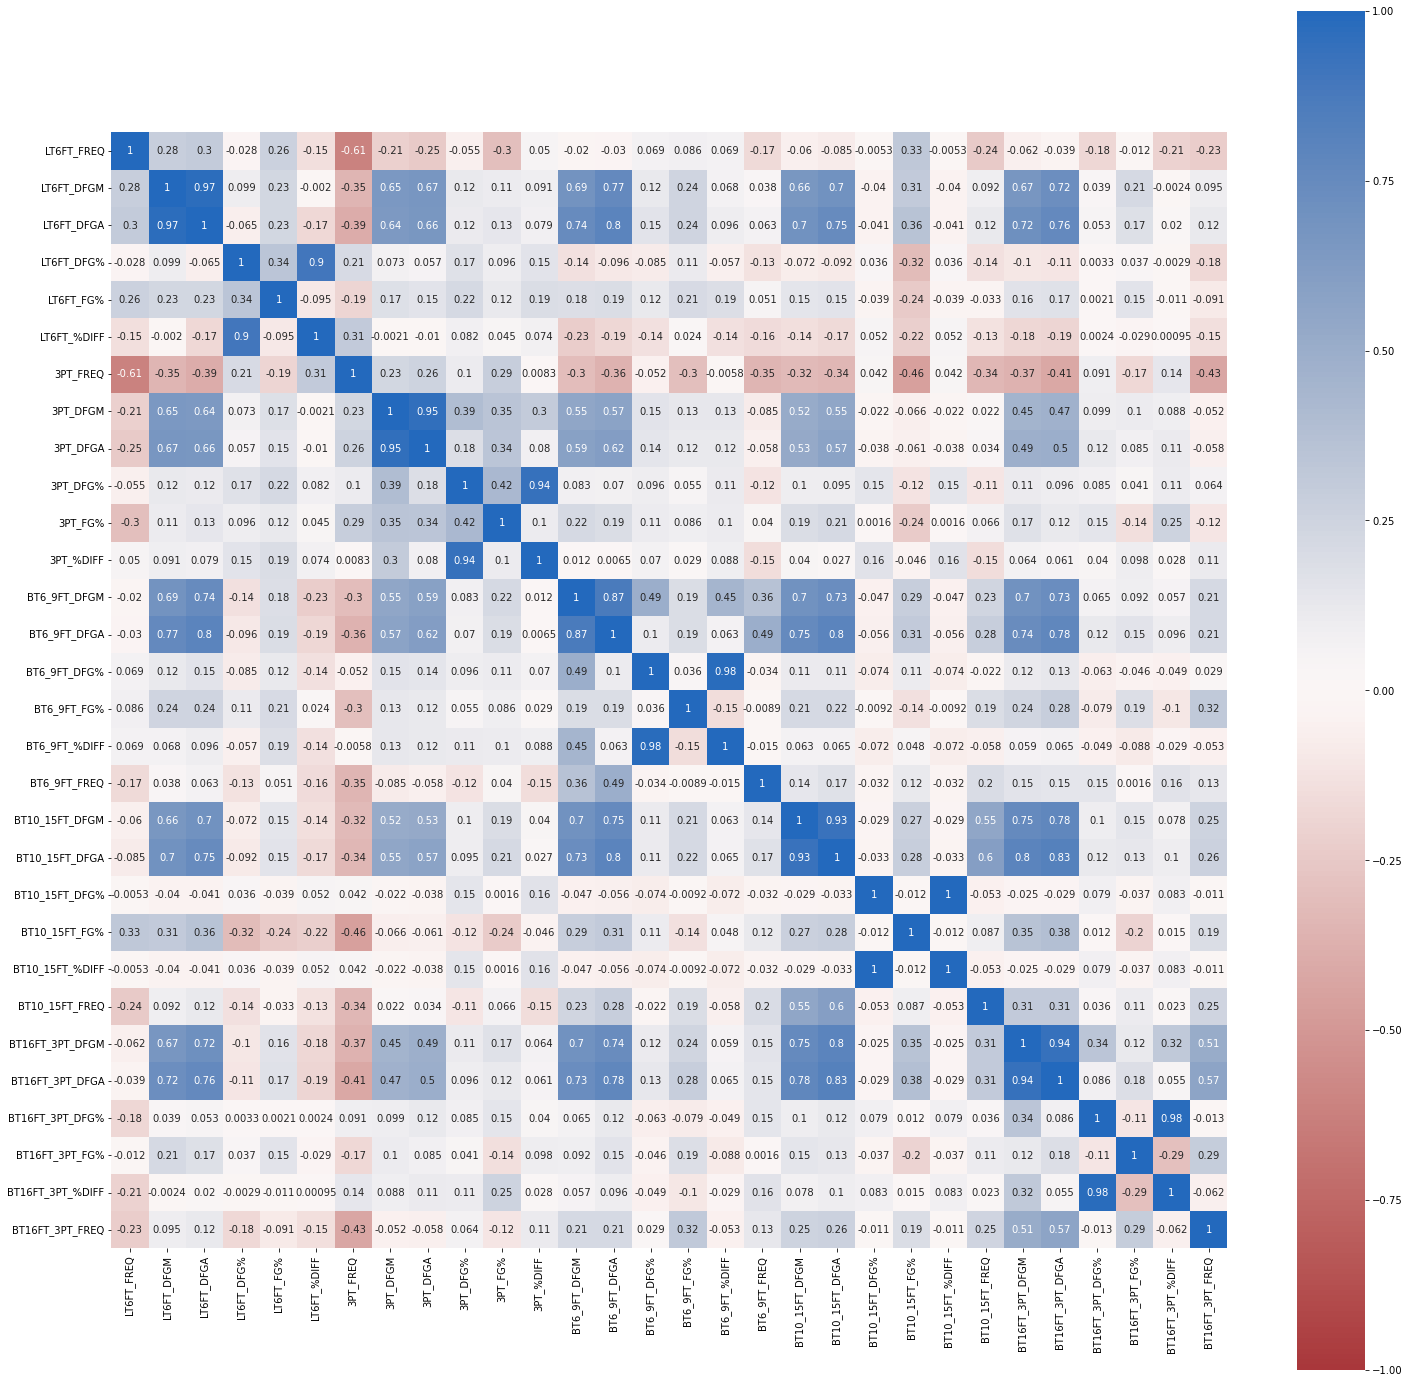

In [16]:
defense_dashboard_corr = defense_dashboard.corr()
plt.figure(figsize=(25,25))
sns.heatmap(defense_dashboard_corr, vmin=-1, vmax=1,center=0, cmap='vlag_r', square=True, annot=True)

In [17]:
defense_dashboard.drop([
       'LT6FT_DFGA', 'LT6FT_DFG%', 'LT6FT_FG%','3PT_DFGA', 
       '3PT_DFG%', '3PT_FG%', 'BT6_9FT_DFGA', 'BT6_9FT_DFG%', 'BT6_9FT_FG%', 
       'BT10_15FT_DFGA', 'BT10_15FT_DFG%', 'BT10_15FT_FG%','BT16FT_3PT_DFGA', 
       'BT16FT_3PT_DFG%', 'BT16FT_3PT_FG%',], 
       axis=1, inplace=True)
defense_dashboard.rename({'PLAYER_LAST_TEAM_ABBREVIATION': 'TEAM_ABBREVIATION'}, axis=1, inplace=True)
defense_dashboard.fillna(0, inplace=True)
defense_dashboard

,PLAYER_NAME,TEAM_ABBREVIATION,PLAYER_POSITION,LT6FT_FREQ,LT6FT_DFGM,LT6FT_%DIFF,3PT_FREQ,3PT_DFGM,3PT_%DIFF,BT6_9FT_DFGM,BT6_9FT_%DIFF,BT6_9FT_FREQ,BT10_15FT_DFGM,BT10_15FT_%DIFF,BT10_15FT_FREQ,BT16FT_3PT_DFGM,BT16FT_3PT_%DIFF,BT16FT_3PT_FREQ
0,Rudy Gobert,UTA,C,0.373,4.10,-0.136,0.218,1.44,-0.068,0.96,-0.177,0.115,1.280000e+00,-9.700000e-02,0.139,1.43,0.020,0.156
1,Brook Lopez,MIL,C,0.346,3.48,-0.117,0.252,1.90,0.022,0.66,-0.146,0.084,1.540000e+00,-3.500000e-02,0.164,1.38,0.064,0.154
2,Domantas Sabonis,IND,F-C,0.477,4.85,-0.064,0.218,1.39,-0.018,0.94,-0.086,0.112,7.200000e-01,-6.200000e-02,0.091,0.64,-0.039,0.101
3,Nikola Jokic,DEN,C,0.428,4.72,-0.016,0.222,1.42,-0.008,0.70,-0.152,0.099,1.100000e+00,-4.200000e-02,0.130,0.88,0.014,0.121
4,Myles Turner,IND,C-F,0.502,4.48,-0.124,0.220,1.59,0.040,0.65,-0.159,0.094,6.800000e-01,-1.030000e-01,0.092,0.67,0.016,0.092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,Theo Pinson,NYK,G-F,0.375,0.33,0.097,0.375,0.25,0.166,0.00,-0.478,0.188,1.000000e-02,9.007199e+13,0.000,0.08,0.652,0.060
533,Keljin Blevins,POR,G,0.278,0.21,-0.028,0.556,0.21,-0.018,0.00,-0.564,0.054,1.000000e-02,-1.770000e-01,0.054,0.00,-0.352,0.062
534,Grant Riller,CHA,G,0.333,0.40,0.409,0.667,0.40,0.132,0.00,0.000,0.000,0.000000e+00,-3.660000e-01,-0.000,0.00,0.000,0.000
535,Robert Woodard II,SAC,F,0.875,0.43,-0.219,0.125,0.14,0.560,0.00,0.000,0.000,-5.551115e-17,2.800000e-02,-0.000,0.00,0.000,0.000


In [18]:
#  hustle df
hustle = dfs[7]
hustle.drop(['Unnamed: 0', 'PLAYER_ID', 'TEAM_ID', 'AGE', 'G', 'MIN', 
       'OFF_BOXOUTS', 'DEF_BOXOUTS',
       'BOX_OUTS', 'BOX_OUT_PLAYER_TEAM_REBS', 'BOX_OUT_PLAYER_REBS',
       'PCT_BOX_OUTS_OFF', 'PCT_BOX_OUTS_DEF', 'PCT_BOX_OUTS_TEAM_REB',
       'PCT_BOX_OUTS_REB'], axis=1, inplace=True)
hustle

,PLAYER_NAME,TEAM_ABBREVIATION,CONTESTED_SHOTS,CONTESTED_SHOTS_2PT,CONTESTED_SHOTS_3PT,DEFLECTIONS,CHARGES_DRAWN,SCREEN_ASSISTS,SCREEN_AST_PTS,OFF_LOOSE_BALLS_RECOVERED,DEF_LOOSE_BALLS_RECOVERED,LOOSE_BALLS_RECOVERED,PCT_LOOSE_BALLS_RECOVERED_OFF,PCT_LOOSE_BALLS_RECOVERED_DEF
0,Aaron Gordon,DEN,3.78,2.46,1.32,1.02,0.00,0.52,1.22,0.42,0.22,0.64,0.656,0.344
1,Aaron Holiday,IND,3.09,1.29,1.80,1.47,0.00,0.03,0.06,0.17,0.23,0.39,0.423,0.577
2,Aaron Nesmith,BOS,2.87,1.83,1.04,0.52,0.02,0.13,0.30,0.33,0.24,0.57,0.577,0.423
3,Abdel Nader,PHX,3.17,1.92,1.25,0.75,0.00,0.04,0.08,0.17,0.21,0.38,0.444,0.556
4,Adam Mokoka,CHI,0.29,0.21,0.07,0.29,0.00,0.00,0.00,0.07,0.00,0.07,1.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,Yogi Ferrell,LAC,1.40,0.80,0.60,0.80,0.00,0.20,0.50,0.10,0.90,1.00,0.100,0.900
536,Yuta Watanabe,TOR,3.92,1.86,2.06,0.68,0.02,0.28,0.72,0.14,0.22,0.36,0.389,0.611
537,Zach LaVine,CHI,6.45,3.26,3.19,1.33,0.00,0.33,0.72,0.38,0.40,0.78,0.489,0.511
538,Zeke Nnaji,DEN,2.52,1.36,1.17,0.52,0.00,0.26,0.62,0.05,0.07,0.12,0.400,0.600


<AxesSubplot:>

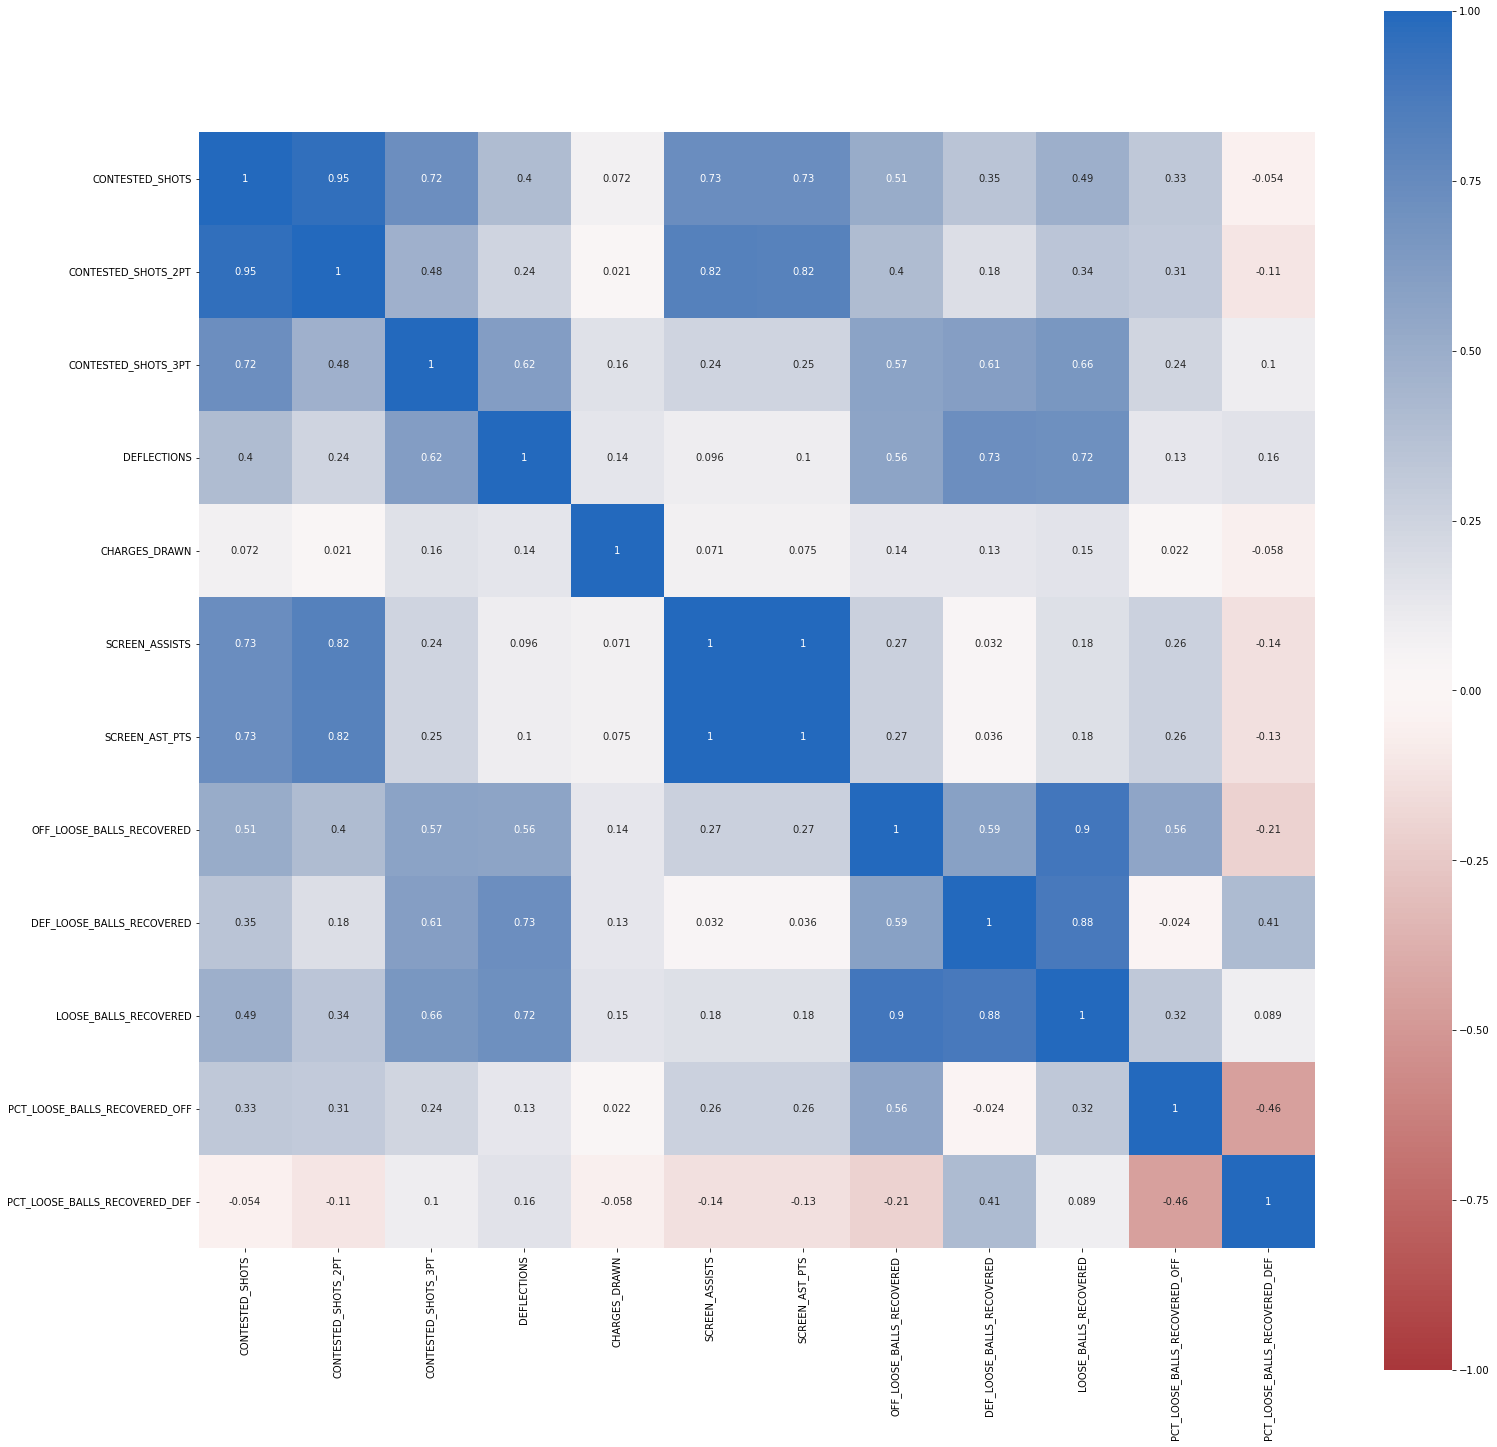

In [19]:
hustle_corr = hustle.corr()
plt.figure(figsize=(25,25))
sns.heatmap(hustle_corr, vmin=-1, vmax=1,center=0, cmap='vlag_r', square=True, annot=True)

In [20]:
hustle.drop(['CONTESTED_SHOTS', 'SCREEN_AST_PTS', 'LOOSE_BALLS_RECOVERED',
            'PCT_LOOSE_BALLS_RECOVERED_OFF', 'PCT_LOOSE_BALLS_RECOVERED_DEF'], axis=1, inplace=True)


In [21]:
# shooting df
shooting = dfs[8]
shooting.drop(['Unnamed: 0', 'PLAYER_ID', 'TEAM_ID', 'NICKNAME', 'AGE', 'FGM.6', 
              'FGA.6', 'FG_PCT.6', 'FGM.7', 'FGA.7', 'FG_PCT.7', 'FGM.8', 'FGA.8', 'FG_PCT.8'], axis=1, inplace=True)
shooting.rename({
       'FGM': 'LT_5FT_FGM',
       'FGA': 'LT_5FT_FGA',
       'FG_PCT': 'LT_5FT_FG%',
       'FGM.1': 'BT5_9FT_FGM',
       'FGA.1': 'BT5_9FT_FGA',
       'FG_PCT.1': 'BT5_9FT_FG%',
       'FGM.2': 'BT10_14FT_FGM',
       'FGA.2': 'BT10_14FT_FGA',
       'FG_PCT.2': 'BT10_14FT_FG%',
       'FGM.3': 'BT15_19FT_FGM',
       'FGA.3': 'BT15_19FT_FGA',
       'FG_PCT.3': 'BT15_19FT_FG%',
       'FGM.4': 'BT20_24FT_FGM',
       'FGA.4': 'BT20_24FT_FGA',
       'FG_PCT.4': 'BT20_24FT_FG%',
       'FGM.5': 'BT25_29FT_FGM',
       'FGA.5': 'BT25_29FT_FGA',
       'FG_PCT.5': 'BT25_29FT_FG%',
}, axis=1, inplace=True)
shooting.fillna(0, inplace=True)
shooting

,PLAYER_NAME,TEAM_ABBREVIATION,LT_5FT_FGM,LT_5FT_FGA,LT_5FT_FG%,BT5_9FT_FGM,BT5_9FT_FGA,BT5_9FT_FG%,BT10_14FT_FGM,BT10_14FT_FGA,BT10_14FT_FG%,BT15_19FT_FGM,BT15_19FT_FGA,BT15_19FT_FG%,BT20_24FT_FGM,BT20_24FT_FGA,BT20_24FT_FG%,BT25_29FT_FGM,BT25_29FT_FGA,BT25_29FT_FG%
0,Aaron Gordon,DEN,2.2,3.5,0.631,0.4,0.9,0.447,0.5,1.1,0.455,0.3,0.7,0.361,0.5,1.4,0.348,0.7,2.2,0.330
1,Aaron Holiday,IND,1.0,2.2,0.426,0.3,0.8,0.333,0.2,0.5,0.367,0.2,0.3,0.550,0.3,0.8,0.407,0.7,1.9,0.341
2,Aaron Nesmith,BOS,0.6,1.0,0.617,0.1,0.3,0.333,0.1,0.2,0.444,0.0,0.0,1.000,0.5,1.3,0.339,0.4,1.0,0.413
3,Abdel Nader,PHX,1.3,2.3,0.564,0.3,0.5,0.583,0.0,0.2,0.250,0.0,0.1,0.000,0.4,0.8,0.444,0.4,1.0,0.400
4,Adam Mokoka,CHI,0.5,0.8,0.667,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.1,0.8,0.143,0.0,0.2,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,Yogi Ferrell,LAC,0.4,0.8,0.571,0.1,0.4,0.250,0.6,1.4,0.455,0.1,0.7,0.167,0.2,0.6,0.333,0.6,2.3,0.238
536,Yuta Watanabe,TOR,0.6,1.1,0.593,0.1,0.3,0.353,0.1,0.3,0.250,0.0,0.1,0.333,0.3,1.0,0.298,0.4,0.8,0.500
537,Zach LaVine,CHI,4.5,7.1,0.636,0.3,0.8,0.444,0.3,0.9,0.392,0.8,1.5,0.541,1.4,3.2,0.443,2.4,5.8,0.411
538,Zeke Nnaji,DEN,0.6,0.8,0.710,0.0,0.1,0.000,0.1,0.1,0.500,0.1,0.1,0.500,0.4,0.8,0.433,0.3,0.7,0.367


<AxesSubplot:>

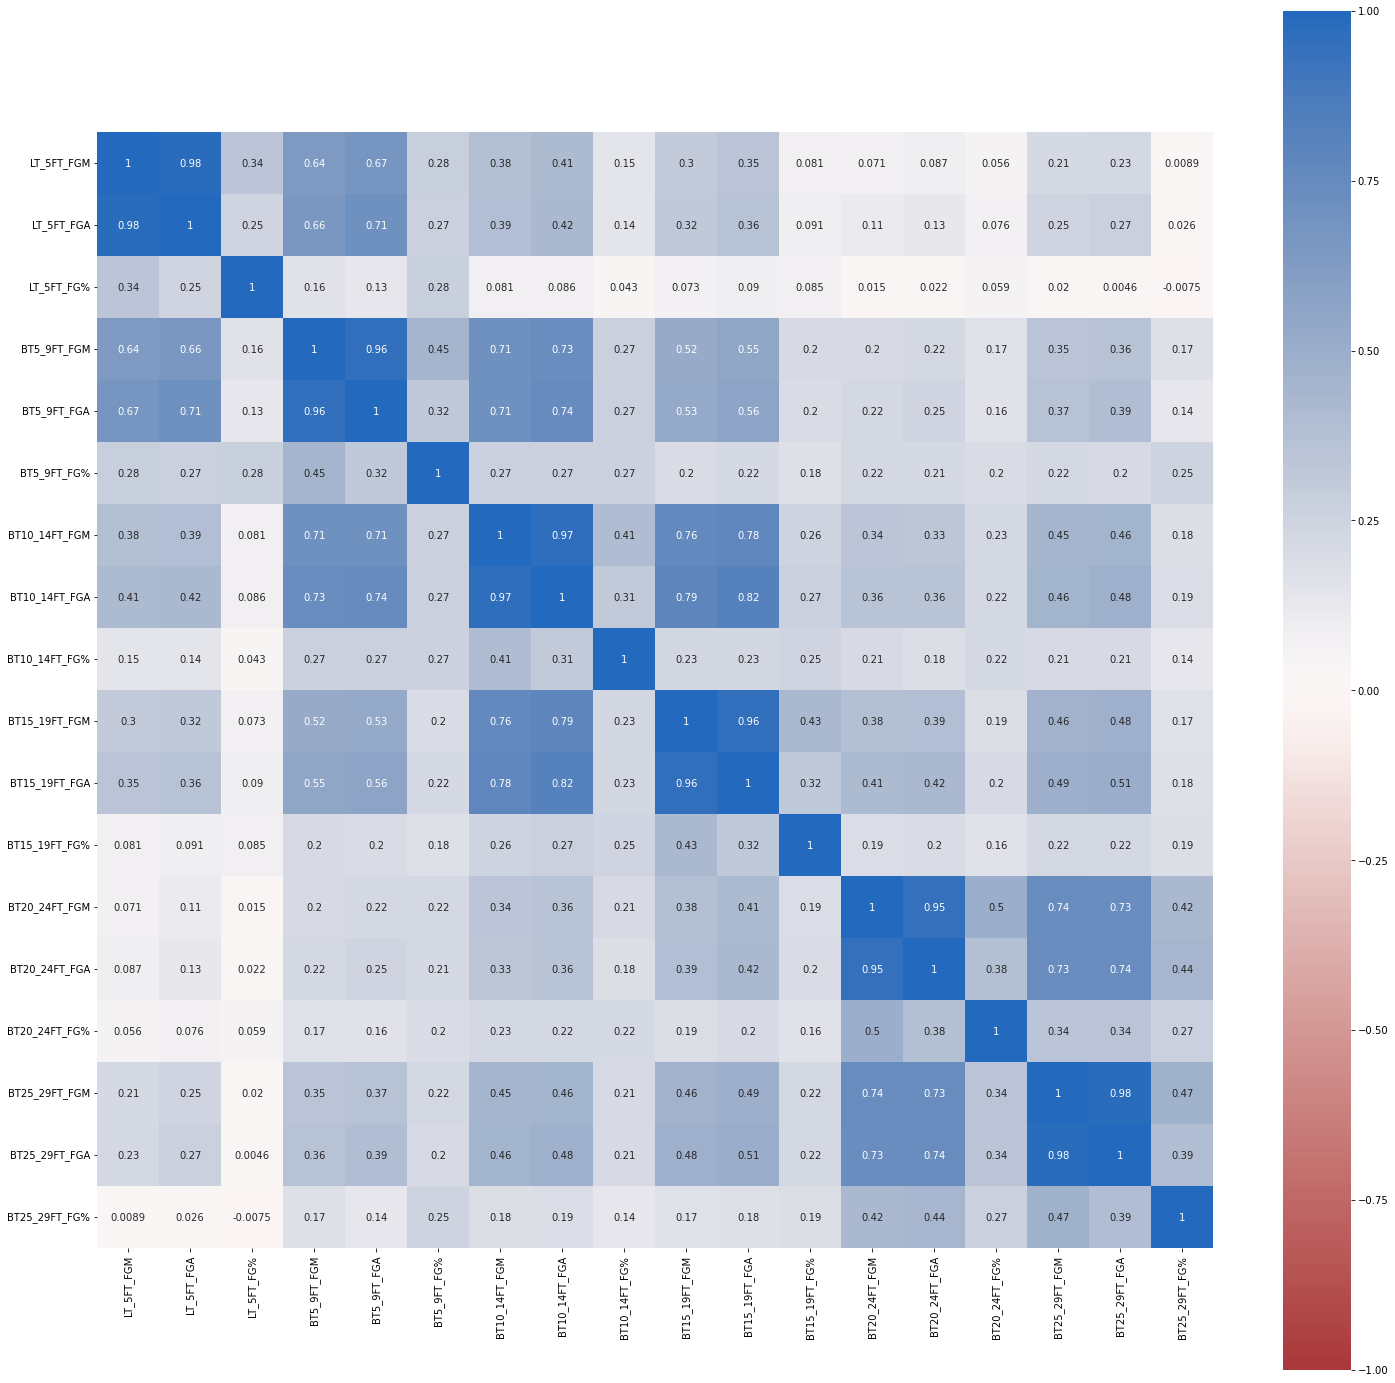

In [22]:
shooting_corr = shooting.corr()
plt.figure(figsize=(25,25))
sns.heatmap(shooting_corr, vmin=-1, vmax=1,center=0, cmap='vlag_r', square=True, annot=True)

In [23]:
shooting.drop(['LT_5FT_FGA','BT5_9FT_FGA','BT10_14FT_FGA', 
            'BT15_19FT_FGA', 'BT20_24FT_FGA','BT25_29FT_FGA'], axis=1, inplace=True)

In [24]:
# playtype_isolation df
playtype_isolation = dfs[9]
playtype_isolation.drop(['Unnamed: 0', 'SEASON_ID', 'PLAYER_ID', 'TEAM_ID', 'TEAM_NAME', 
     'GP', 'PLAY_TYPE', 'TYPE_GROUPING', 'FGMX'], axis=1, inplace=True)
playtype_isolation

,PLAYER_NAME,TEAM_ABBREVIATION,PERCENTILE,POSS_PCT,PPP,FG_PCT,FT_POSS_PCT,TOV_POSS_PCT,SF_POSS_PCT,PLUSONE_POSS_PCT,SCORE_POSS_PCT,EFG_PCT,POSS,PTS,FGM,FGA
0,Damian Lillard,POR,0.895,0.191,1.106,0.442,0.169,0.097,0.133,0.021,0.480,0.534,4.9,5.5,1.6,3.7
1,Julius Randle,NYK,0.581,0.227,0.901,0.420,0.109,0.089,0.102,0.028,0.430,0.449,5.5,5.0,1.9,4.6
2,Russell Westbrook,WAS,0.335,0.240,0.783,0.395,0.137,0.135,0.135,0.029,0.395,0.408,6.4,5.0,1.9,4.8
3,Luka Doncic,DAL,0.802,0.167,1.046,0.463,0.111,0.108,0.088,0.023,0.458,0.555,4.6,4.8,1.7,3.7
4,James Harden,BKN,0.875,0.336,1.091,0.435,0.153,0.094,0.146,0.024,0.460,0.531,8.0,8.7,2.7,6.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,Seth Curry,PHI,0.020,0.022,0.286,0.077,0.071,0.000,0.071,0.000,0.143,0.115,0.2,0.1,0.0,0.2
242,Denzel Valentine,CHI,0.016,0.034,0.250,0.133,0.000,0.063,0.000,0.000,0.125,0.133,0.3,0.1,0.0,0.2
243,Patrick Beverley,LAC,0.012,0.065,0.222,0.000,0.111,0.222,0.111,0.000,0.111,0.000,0.5,0.1,0.0,0.3
244,Draymond Green,GSW,0.004,0.017,0.200,0.143,0.000,0.300,0.000,0.000,0.100,0.143,0.2,0.0,0.0,0.1


<AxesSubplot:>

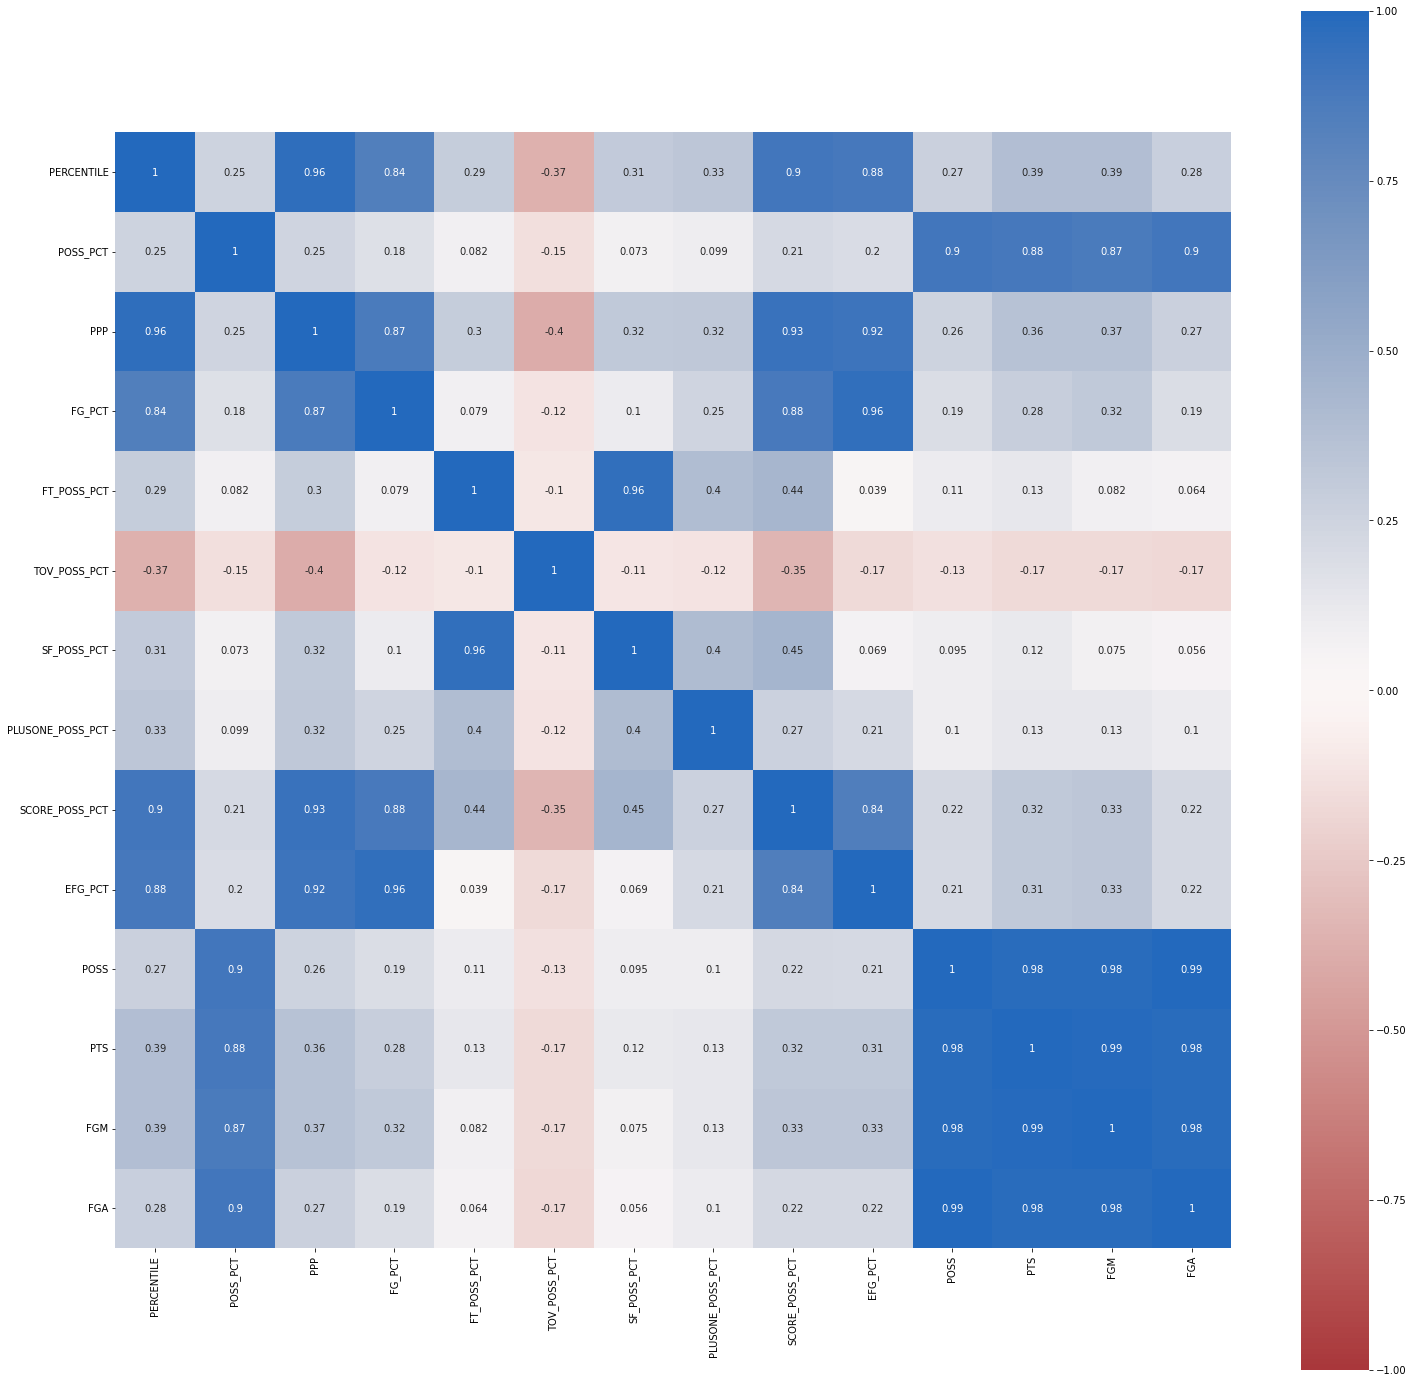

In [25]:
playtype_isolation_corr = playtype_isolation.corr()
plt.figure(figsize=(25,25))
sns.heatmap(playtype_isolation_corr, vmin=-1, vmax=1,center=0, cmap='vlag_r', square=True, annot=True)

In [26]:
playtype_isolation.drop(['PERCENTILE', 'POSS_PCT','FT_POSS_PCT', 'TOV_POSS_PCT', 'SF_POSS_PCT', 
                         'PLUSONE_POSS_PCT', 'SCORE_POSS_PCT', 'EFG_PCT', 'PTS', 'FGM', 'FGA'], axis=1, inplace=True)

In [27]:
playtype_isolation.rename({
    'PPP': 'ISO_PPP',
    'FG_PCT': 'ISO_FG%',
    'POSS': 'ISO_POSS'
}, axis=1, inplace=True)


In [28]:
# playtype_pnr_ball_handler df
playtype_pnr_ball_handler = dfs[10]
playtype_pnr_ball_handler.drop(['Unnamed: 0', 'SEASON_ID', 'PLAYER_ID', 'TEAM_ID', 'TEAM_NAME', 
                                'GP', 'PLAY_TYPE', 'TYPE_GROUPING','FGMX'], axis=1, inplace=True)
playtype_pnr_ball_handler

,PLAYER_NAME,TEAM_ABBREVIATION,PERCENTILE,POSS_PCT,PPP,FG_PCT,FT_POSS_PCT,TOV_POSS_PCT,SF_POSS_PCT,PLUSONE_POSS_PCT,SCORE_POSS_PCT,EFG_PCT,POSS,PTS,FGM,FGA
0,Trae Young,ATL,0.773,0.562,0.980,0.435,0.149,0.145,0.118,0.018,0.444,0.494,14.1,13.9,4.5,10.2
1,Luka Doncic,DAL,0.827,0.477,1.006,0.491,0.127,0.156,0.116,0.027,0.456,0.564,13.2,13.3,4.8,9.8
2,Damian Lillard,POR,0.909,0.463,1.073,0.443,0.130,0.112,0.115,0.024,0.451,0.538,12.0,12.9,4.1,9.4
3,Zach LaVine,CHI,0.820,0.435,1.000,0.478,0.091,0.164,0.084,0.024,0.430,0.567,10.8,10.8,4.0,8.3
4,De'Aaron Fox,SAC,0.691,0.441,0.939,0.461,0.168,0.120,0.160,0.037,0.463,0.492,11.1,10.4,3.8,8.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,Langston Galloway,PHX,0.021,0.084,0.429,0.273,0.000,0.214,0.000,0.000,0.214,0.273,0.4,0.2,0.1,0.3
305,Austin Rivers,DEN,0.003,0.146,0.316,0.200,0.000,0.211,0.000,0.000,0.158,0.200,1.3,0.4,0.2,1.0
306,Ignas Brazdeikis,ORL,0.033,0.104,0.500,0.333,0.100,0.300,0.000,0.000,0.300,0.333,1.3,0.6,0.3,0.8
307,Victor Oladipo,MIA,0.006,0.231,0.333,0.222,0.067,0.333,0.000,0.000,0.200,0.222,3.8,1.3,0.5,2.3


<AxesSubplot:>

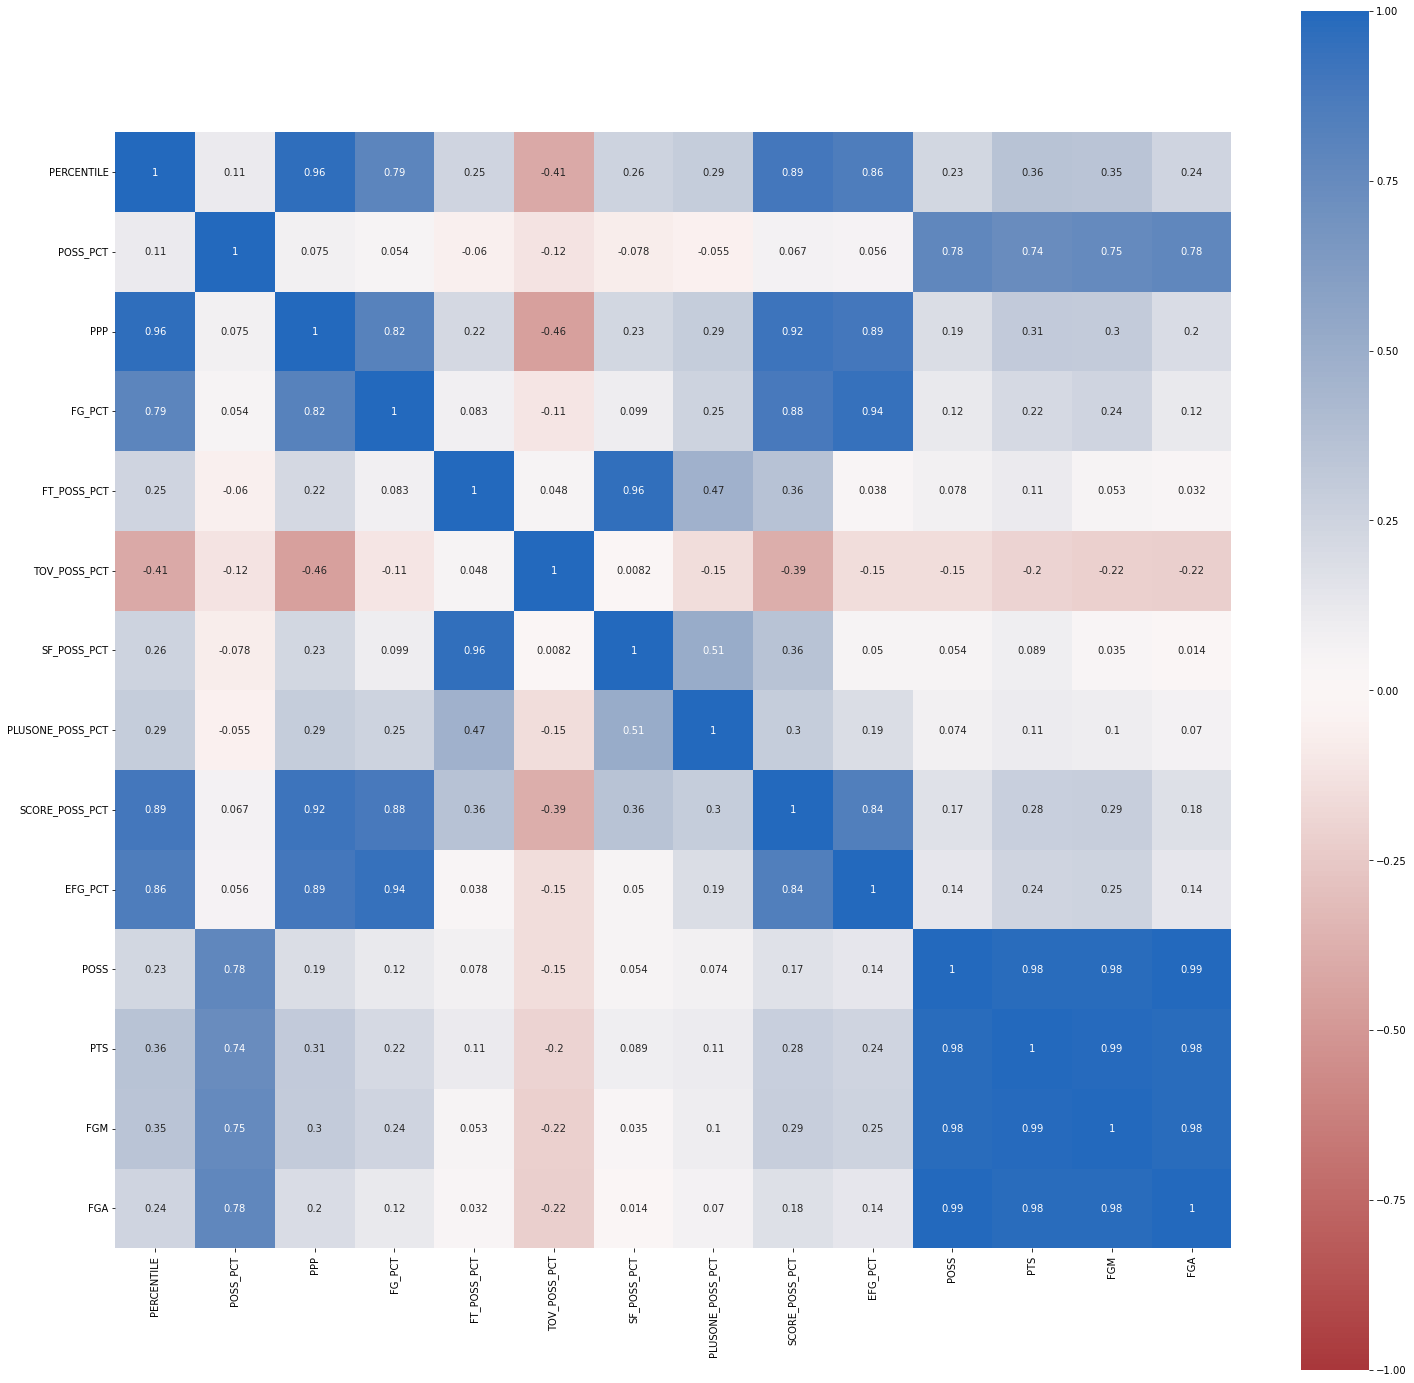

In [29]:
playtype_pnr_ball_handler_corr = playtype_pnr_ball_handler.corr()
plt.figure(figsize=(25,25))
sns.heatmap(playtype_pnr_ball_handler_corr, vmin=-1, vmax=1,center=0, cmap='vlag_r', square=True, annot=True)

In [30]:
playtype_pnr_ball_handler.drop(['PERCENTILE', 'POSS_PCT','FT_POSS_PCT', 'TOV_POSS_PCT', 'SF_POSS_PCT',
       'PLUSONE_POSS_PCT', 'SCORE_POSS_PCT', 'EFG_PCT', 'PTS', 'FGM', 'FGA'], axis=1, inplace=True)

In [31]:
playtype_pnr_ball_handler.rename({
    'PPP': 'PNR_HANDLER_PPP',
    'FG_PCT': 'PNR_HANDLER_FG%',
    'POSS': 'PNR_HANDLER_POSS'
}, axis=1, inplace=True)


In [32]:
# playtype_pnr_roll_man df
playtype_pnr_roll_man = dfs[11]
playtype_pnr_roll_man.drop(['Unnamed: 0', 'SEASON_ID', 'PLAYER_ID', 'TEAM_ID', 'TEAM_NAME', 
                            'GP', 'PLAY_TYPE', 'TYPE_GROUPING','FGMX'], axis=1, inplace=True)
playtype_pnr_roll_man

,PLAYER_NAME,TEAM_ABBREVIATION,PERCENTILE,POSS_PCT,PPP,FG_PCT,FT_POSS_PCT,TOV_POSS_PCT,SF_POSS_PCT,PLUSONE_POSS_PCT,SCORE_POSS_PCT,EFG_PCT,POSS,PTS,FGM,FGA
0,Rudy Gobert,UTA,0.866,0.317,1.339,0.714,0.266,0.088,0.259,0.069,0.679,0.714,3.9,5.2,2.0,2.8
1,Nikola Jokic,DEN,0.626,0.171,1.170,0.530,0.063,0.073,0.059,0.007,0.514,0.608,4.0,4.7,1.8,3.5
2,Richaun Holmes,SAC,0.836,0.355,1.301,0.642,0.148,0.047,0.148,0.047,0.648,0.642,4.2,5.5,2.3,3.6
3,Nikola Vucevic,ORL,0.542,0.229,1.135,0.489,0.038,0.025,0.034,0.013,0.485,0.578,5.4,6.1,2.5,5.1
4,Bam Adebayo,MIA,0.849,0.171,1.323,0.677,0.115,0.057,0.109,0.042,0.661,0.677,3.0,4.0,1.8,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,Trey Burke,DAL,0.021,0.024,0.500,0.222,0.000,0.100,0.000,0.000,0.200,0.278,0.2,0.1,0.0,0.1
224,Marcus Smart,BOS,0.017,0.016,0.364,0.000,0.182,0.182,0.182,0.000,0.182,0.000,0.2,0.1,0.0,0.1
225,Devonte' Graham,CHA,0.008,0.016,0.231,0.077,0.000,0.000,0.000,0.000,0.077,0.115,0.2,0.1,0.0,0.2
226,Nicolo Melli,NOP,0.004,0.211,0.200,0.083,0.067,0.133,0.067,0.000,0.133,0.083,0.7,0.1,0.0,0.5


<AxesSubplot:>

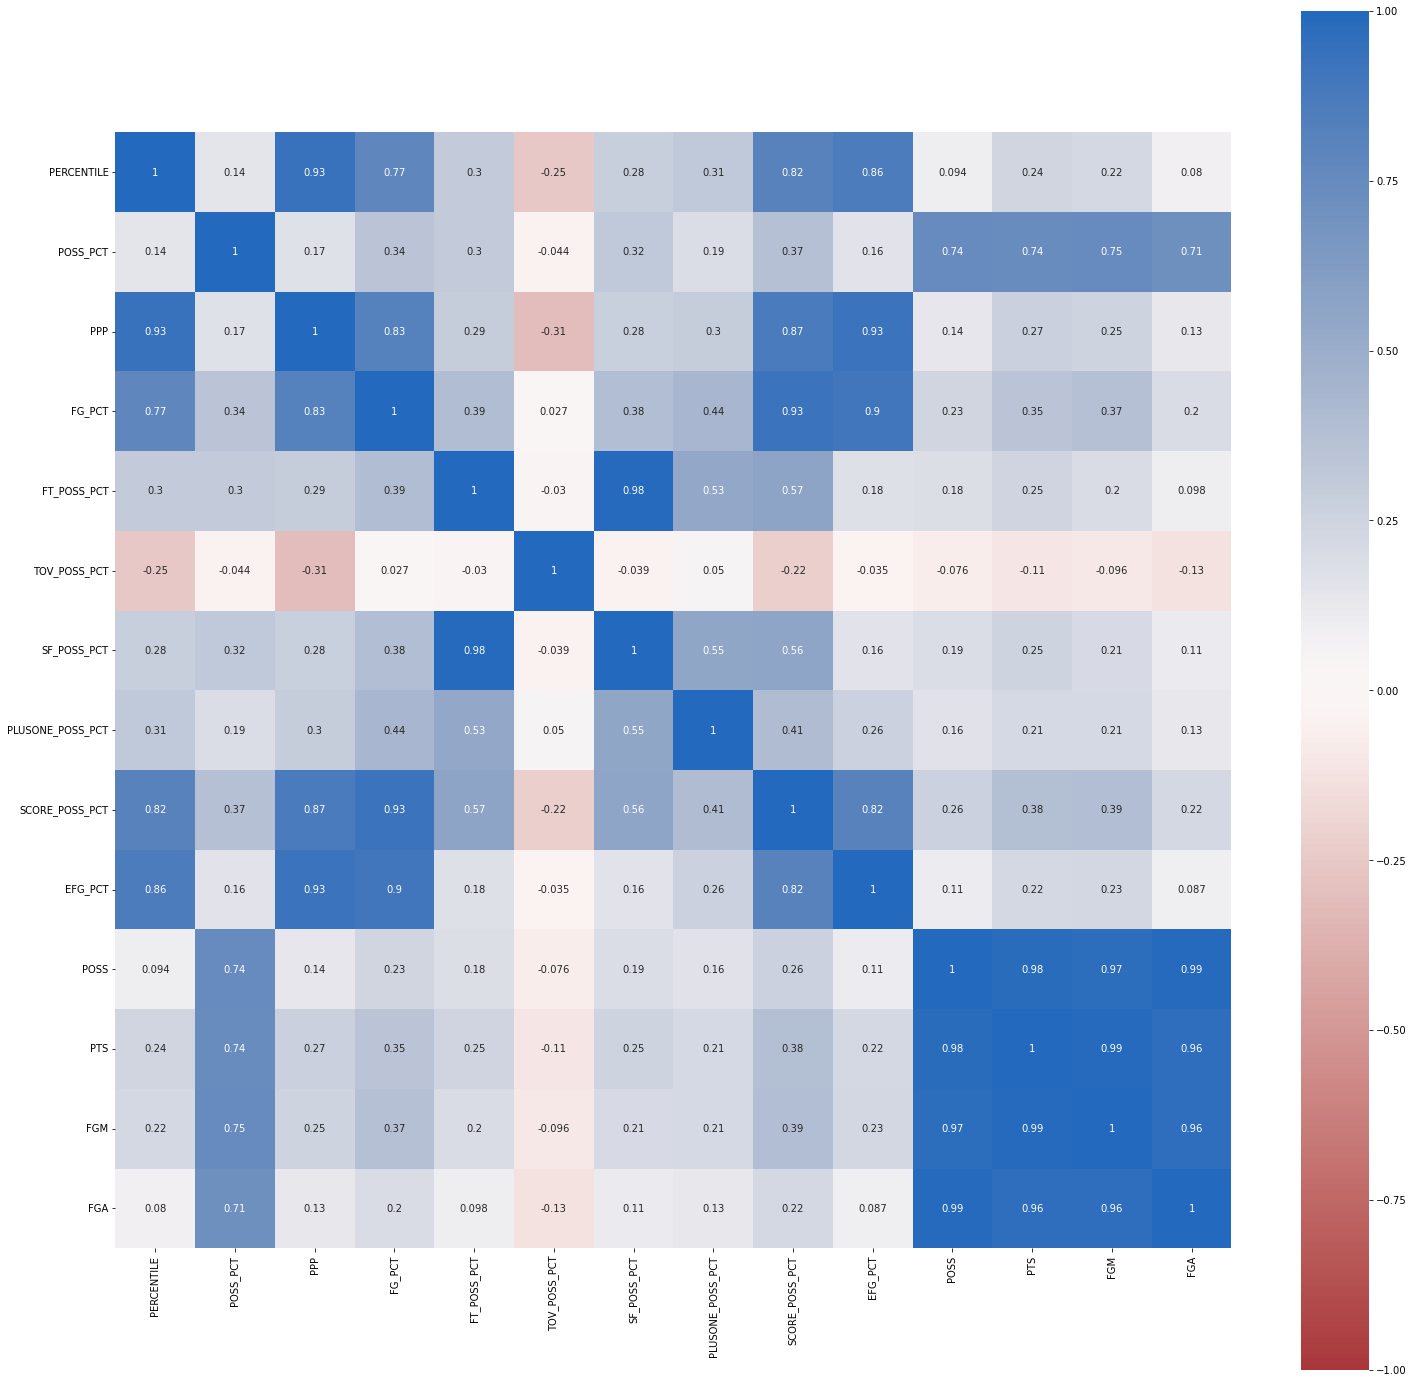

In [33]:
playtype_pnr_roll_man_corr = playtype_pnr_roll_man.corr()
plt.figure(figsize=(25,25))
sns.heatmap(playtype_pnr_roll_man_corr, vmin=-1, vmax=1,center=0, cmap='vlag_r', square=True, annot=True)

In [34]:
playtype_pnr_roll_man.drop(['PERCENTILE', 'POSS_PCT','FT_POSS_PCT', 'TOV_POSS_PCT', 'SF_POSS_PCT',
       'PLUSONE_POSS_PCT', 'SCORE_POSS_PCT', 'EFG_PCT', 'PTS', 'FGM', 'FGA'], axis=1, inplace=True)

In [35]:
playtype_pnr_roll_man.rename({
    'PPP': 'PNR_ROLLMAN_PPP',
    'FG_PCT': 'PNR_ROLLMAN_FG%',
    'POSS': 'PNR_ROLLMAN_POSS'
}, axis=1, inplace=True)

In [36]:
# playtype_transition df
playtype_transition = dfs[12]
playtype_transition.drop(['Unnamed: 0', 'SEASON_ID', 'PLAYER_ID', 'TEAM_ID', 'TEAM_NAME', 
                          'GP', 'PLAY_TYPE', 'TYPE_GROUPING','FGMX'], axis=1, inplace=True)
playtype_transition

,PLAYER_NAME,TEAM_ABBREVIATION,PERCENTILE,POSS_PCT,PPP,FG_PCT,FT_POSS_PCT,TOV_POSS_PCT,SF_POSS_PCT,PLUSONE_POSS_PCT,SCORE_POSS_PCT,EFG_PCT,POSS,PTS,FGM,FGA
0,Giannis Antetokounmpo,MIL,0.748,0.264,1.234,0.636,0.290,0.122,0.280,0.085,0.611,0.673,6.6,8.2,2.8,4.4
1,Russell Westbrook,WAS,0.201,0.225,0.943,0.529,0.193,0.193,0.167,0.041,0.481,0.537,6.0,5.6,2.1,3.9
2,Terry Rozier,CHA,0.679,0.220,1.201,0.542,0.088,0.092,0.082,0.037,0.503,0.641,4.3,5.1,2.0,3.6
3,Jaylen Brown,BOS,0.551,0.224,1.143,0.573,0.149,0.130,0.130,0.039,0.536,0.632,5.3,6.1,2.3,4.0
4,Devin Booker,PHX,0.535,0.182,1.137,0.500,0.163,0.090,0.150,0.043,0.513,0.559,4.5,5.1,1.8,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,Nicolo Melli,DAL,0.068,0.104,0.800,0.375,0.100,0.100,0.100,0.000,0.400,0.375,0.4,0.3,0.1,0.3
447,Ignas Brazdeikis,ORL,0.021,0.125,0.667,0.300,0.000,0.167,0.000,0.000,0.250,0.400,1.5,1.0,0.4,1.3
448,P.J. Tucker,HOU,0.006,0.087,0.467,0.300,0.000,0.333,0.000,0.000,0.200,0.350,0.5,0.2,0.1,0.3
449,Frank Ntilikina,NYK,0.000,0.140,0.286,0.100,0.143,0.143,0.071,0.000,0.143,0.150,0.4,0.1,0.0,0.3


<AxesSubplot:>

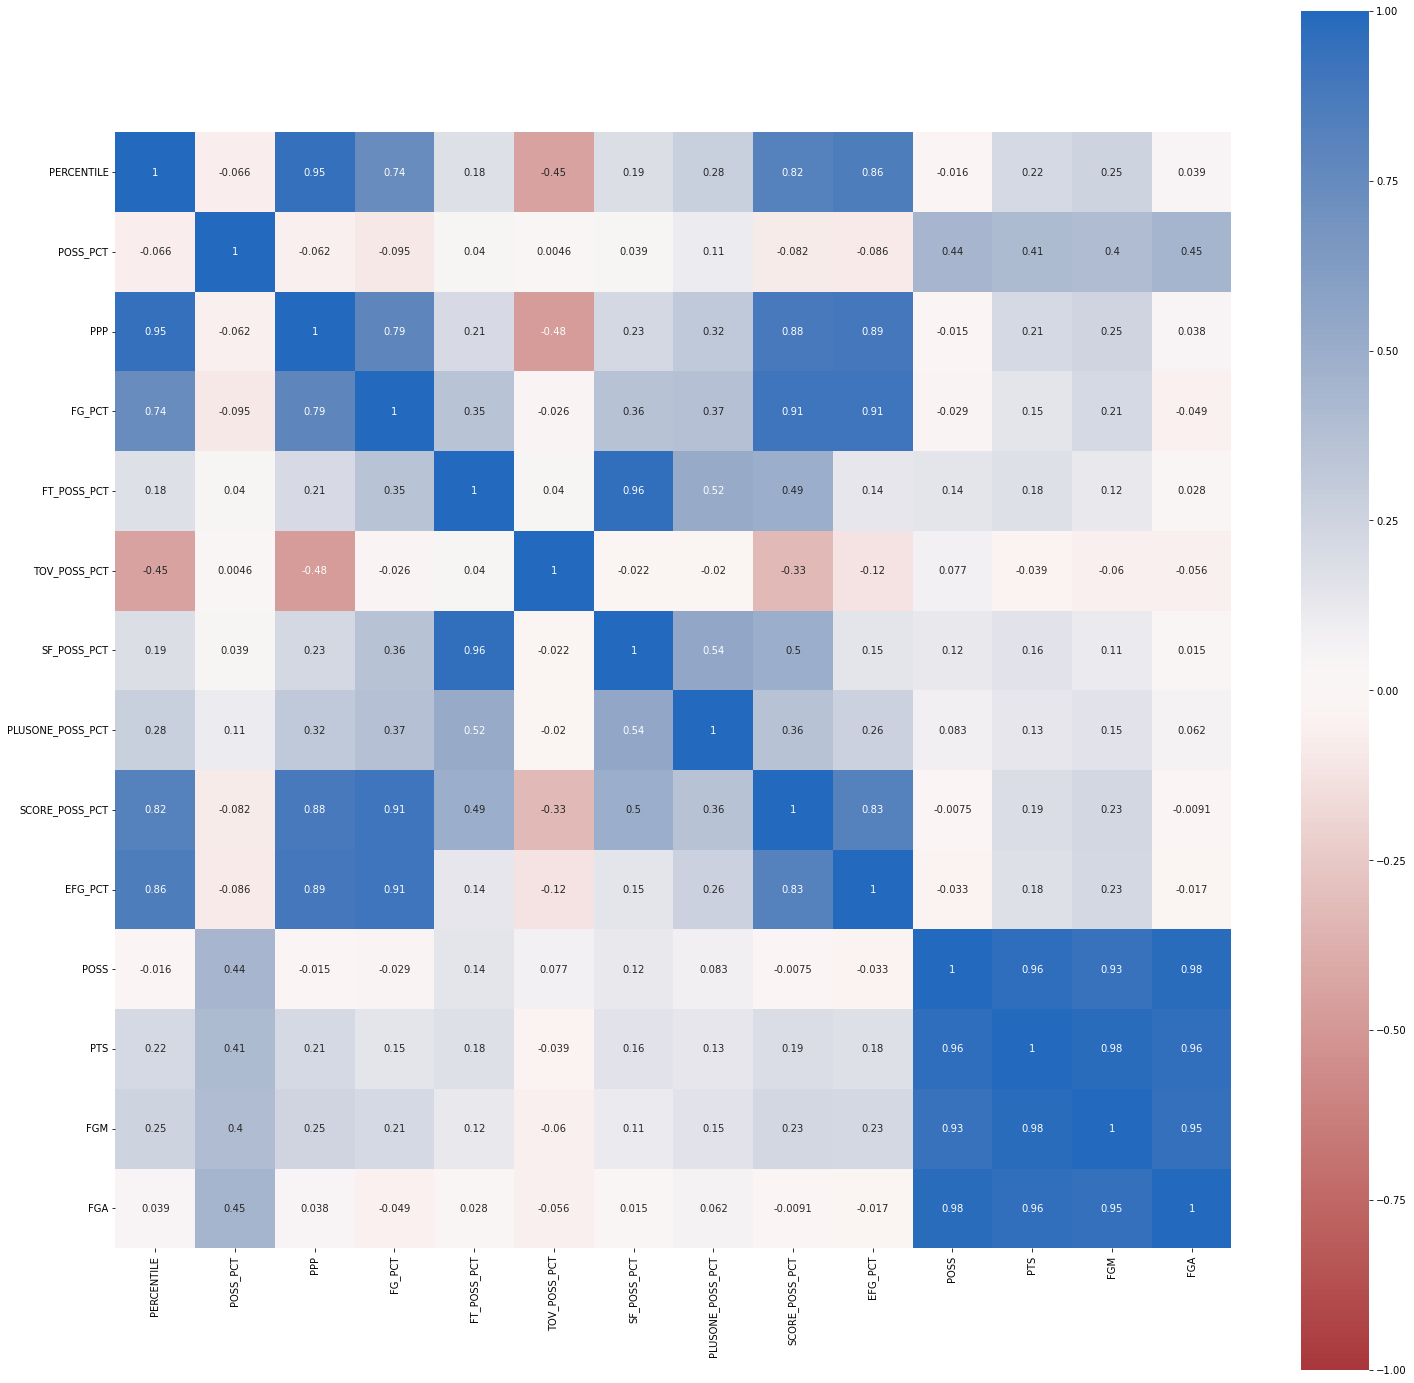

In [37]:
playtype_transition_corr = playtype_transition.corr()
plt.figure(figsize=(25,25))
sns.heatmap(playtype_transition_corr, vmin=-1, vmax=1,center=0, cmap='vlag_r', square=True, annot=True)

In [38]:
playtype_transition.drop(['PERCENTILE', 'POSS_PCT','FT_POSS_PCT', 'TOV_POSS_PCT', 'SF_POSS_PCT',
       'PLUSONE_POSS_PCT', 'SCORE_POSS_PCT', 'EFG_PCT', 'PTS', 'FGM', 'FGA'], axis=1, inplace=True)

In [39]:
playtype_transition.rename({
    'PPP': 'TRANSITION_PPP',
    'FG_PCT': 'TRANSITION_FG%',
    'POSS': 'TRANSITION_POSS'
}, axis=1, inplace=True)

In [40]:
# playtype_post_up df
playtype_post_up = dfs[13]
playtype_post_up.drop(['Unnamed: 0', 'SEASON_ID', 'PLAYER_ID', 'TEAM_ID', 'TEAM_NAME', 
                        'GP', 'PLAY_TYPE', 'TYPE_GROUPING','FGMX'], axis=1, inplace=True)
playtype_post_up

,PLAYER_NAME,TEAM_ABBREVIATION,PERCENTILE,POSS_PCT,PPP,FG_PCT,FT_POSS_PCT,TOV_POSS_PCT,SF_POSS_PCT,PLUSONE_POSS_PCT,SCORE_POSS_PCT,EFG_PCT,POSS,PTS,FGM,FGA
0,Joel Embiid,PHI,0.831,0.365,1.080,0.526,0.247,0.135,0.207,0.042,0.549,0.526,9.3,10.0,3.2,6.1
1,Nikola Jokic,DEN,0.725,0.246,1.039,0.556,0.140,0.140,0.111,0.031,0.518,0.556,5.8,6.0,2.4,4.3
2,Julius Randle,NYK,0.469,0.173,0.930,0.467,0.180,0.153,0.157,0.047,0.467,0.467,4.2,3.9,1.4,3.0
3,Jonas Valanciunas,MEM,0.706,0.258,1.033,0.578,0.154,0.174,0.137,0.017,0.523,0.578,3.9,4.0,1.5,2.7
4,Deandre Ayton,PHX,0.488,0.275,0.936,0.500,0.089,0.123,0.081,0.030,0.462,0.500,3.4,3.2,1.4,2.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Gorgui Dieng,MEM,0.156,0.073,0.727,0.333,0.091,0.091,0.091,0.000,0.364,0.333,0.5,0.4,0.1,0.4
151,Aron Baynes,TOR,0.094,0.035,0.615,0.364,0.000,0.154,0.000,0.000,0.308,0.364,0.2,0.2,0.1,0.2
152,Bismack Biyombo,CHA,0.019,0.044,0.438,0.333,0.125,0.313,0.000,0.000,0.250,0.333,0.2,0.1,0.0,0.1
153,Zach LaVine,CHI,0.013,0.007,0.400,0.222,0.000,0.100,0.000,0.000,0.200,0.222,0.2,0.1,0.0,0.2


<AxesSubplot:>

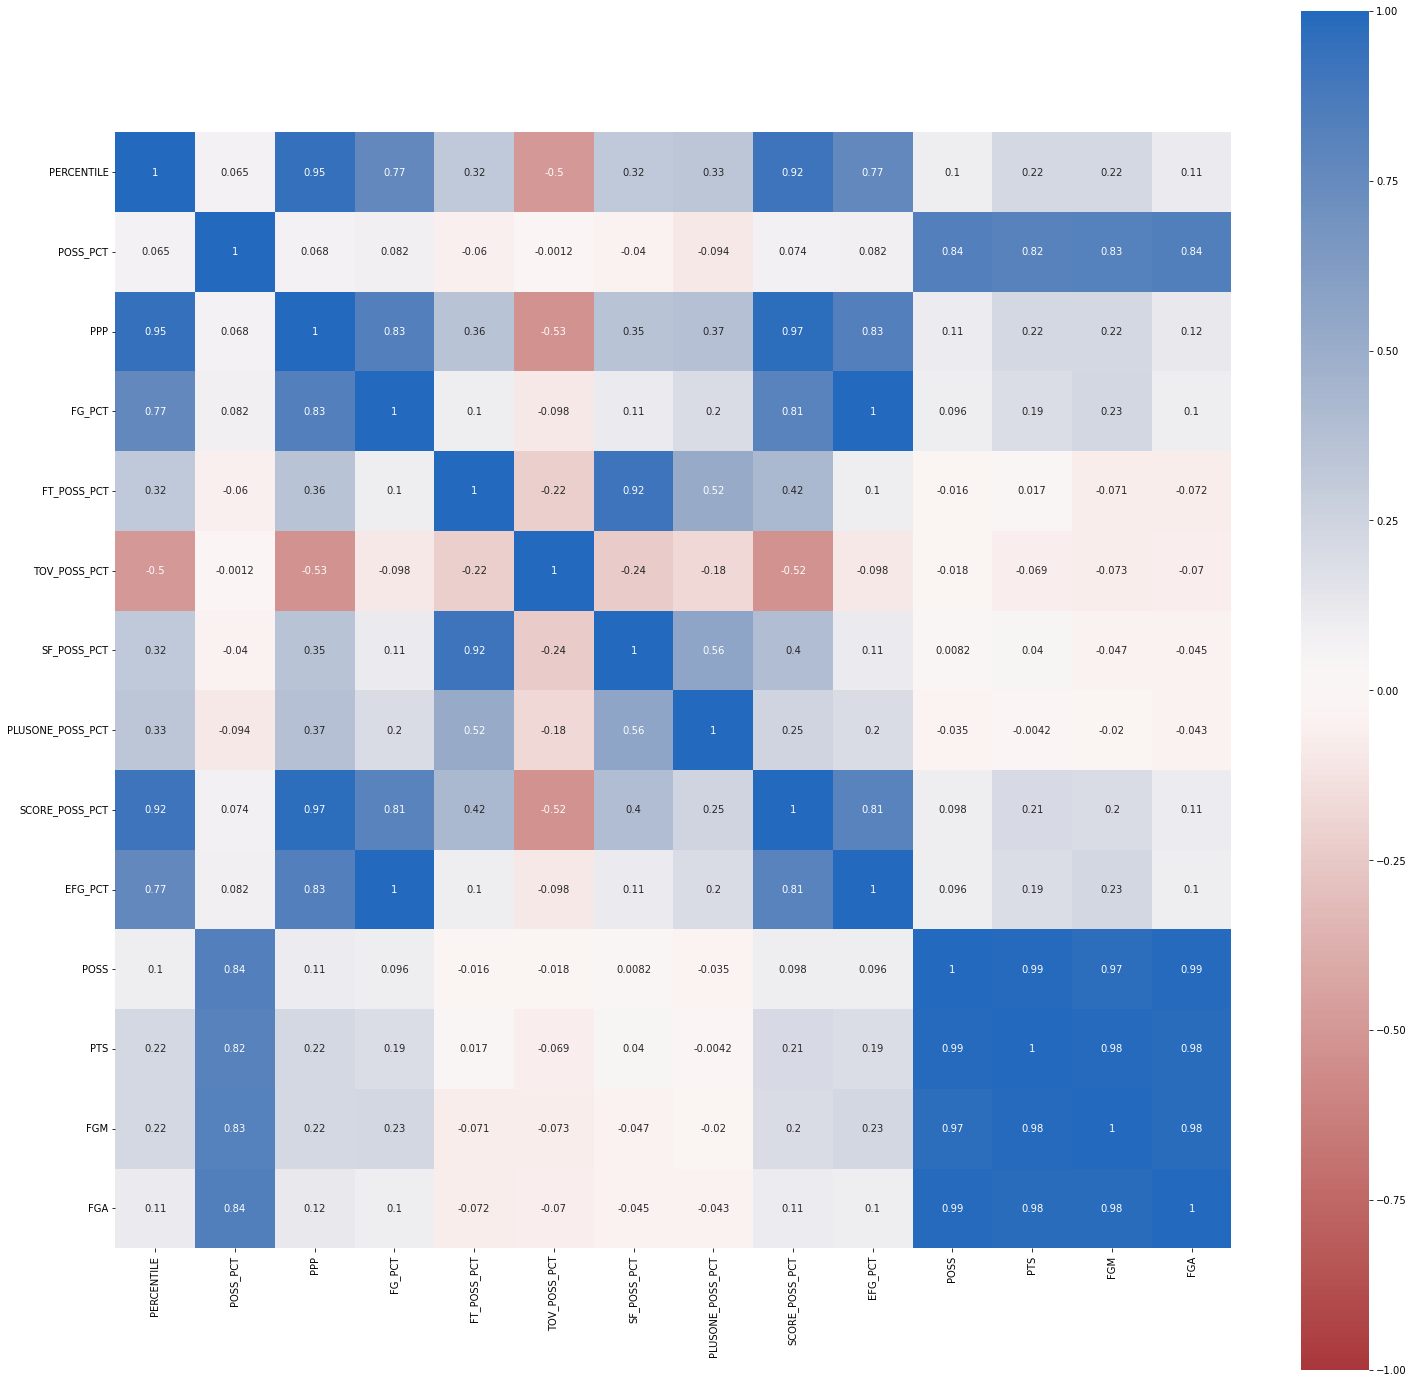

In [41]:
playtype_post_up_corr = playtype_post_up.corr()
plt.figure(figsize=(25,25))
sns.heatmap(playtype_post_up_corr, vmin=-1, vmax=1,center=0, cmap='vlag_r', square=True, annot=True)

In [42]:
playtype_post_up.drop(['PERCENTILE', 'POSS_PCT','FT_POSS_PCT', 'TOV_POSS_PCT', 'SF_POSS_PCT',
       'PLUSONE_POSS_PCT', 'SCORE_POSS_PCT', 'EFG_PCT', 'PTS', 'FGM', 'FGA'], axis=1, inplace=True)

In [43]:
playtype_post_up.rename({
    'PPP': 'POST_UP_PPP',
    'FG_PCT': 'POST_UP_FG%',
    'POSS': 'POST_UP_POSS'
}, axis=1, inplace=True)


In [44]:
# playtype_spot_up df
playtype_spot_up = dfs[14]
playtype_spot_up.drop(['Unnamed: 0', 'SEASON_ID', 'PLAYER_ID', 'TEAM_ID', 'TEAM_NAME', 
                        'GP', 'PLAY_TYPE', 'TYPE_GROUPING','FGMX'], axis=1, inplace=True)
playtype_spot_up

,PLAYER_NAME,TEAM_ABBREVIATION,PERCENTILE,POSS_PCT,PPP,FG_PCT,FT_POSS_PCT,TOV_POSS_PCT,SF_POSS_PCT,PLUSONE_POSS_PCT,SCORE_POSS_PCT,EFG_PCT,POSS,PTS,FGM,FGA
0,Bojan Bogdanovic,UTA,0.732,0.316,1.111,0.426,0.081,0.084,0.065,0.008,0.432,0.579,5.1,5.7,1.8,4.3
1,Julius Randle,NYK,0.770,0.205,1.135,0.445,0.070,0.076,0.062,0.017,0.435,0.595,5.0,5.7,1.9,4.4
2,RJ Barrett,NYK,0.690,0.279,1.092,0.415,0.043,0.046,0.035,0.011,0.412,0.565,5.1,5.6,2.0,4.7
3,Marcus Morris Sr.,LAC,0.990,0.404,1.426,0.524,0.048,0.055,0.044,0.015,0.511,0.736,4.8,6.8,2.3,4.4
4,Saddiq Bey,DET,0.712,0.422,1.102,0.382,0.056,0.038,0.056,0.012,0.392,0.549,4.9,5.4,1.7,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,Markelle Fultz,ORL,0.054,0.094,0.583,0.250,0.000,0.000,0.000,0.000,0.250,0.292,1.5,0.9,0.4,1.5
462,Chris Chiozza,BKN,0.018,0.116,0.385,0.182,0.000,0.154,0.000,0.000,0.154,0.227,0.6,0.2,0.1,0.5
463,Khyri Thomas,HOU,0.006,0.211,0.250,0.133,0.000,0.063,0.000,0.000,0.125,0.133,3.2,0.8,0.4,3.0
464,Jabari Parker,BOS,0.008,0.180,0.273,0.100,0.000,0.091,0.000,0.000,0.091,0.150,1.1,0.3,0.1,1.0


<AxesSubplot:>

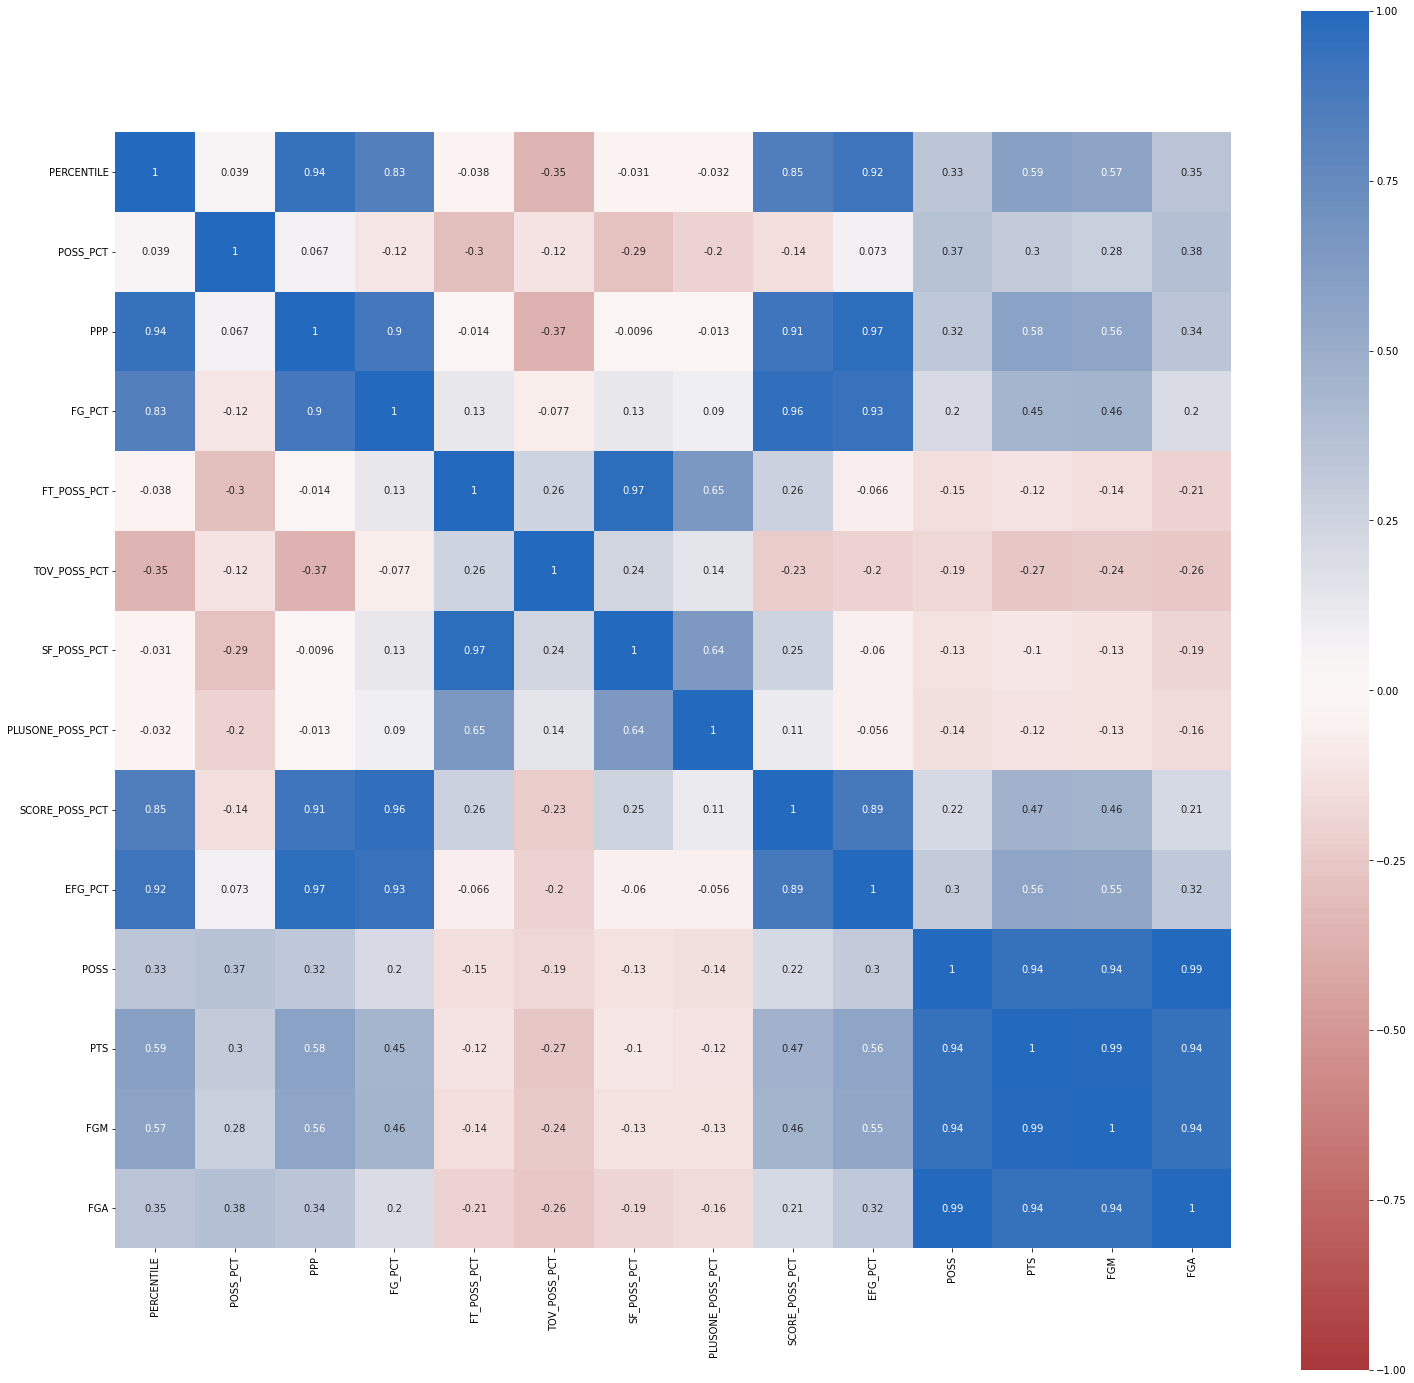

In [45]:
playtype_spot_up_corr = playtype_spot_up.corr()
plt.figure(figsize=(25,25))
sns.heatmap(playtype_spot_up_corr, vmin=-1, vmax=1,center=0, cmap='vlag_r', square=True, annot=True)

In [46]:
playtype_spot_up.drop(['PERCENTILE', 'POSS_PCT','FT_POSS_PCT', 'TOV_POSS_PCT', 'SF_POSS_PCT',
       'PLUSONE_POSS_PCT', 'SCORE_POSS_PCT', 'EFG_PCT', 'PTS', 'FGM', 'FGA'], axis=1, inplace=True)

In [47]:
playtype_spot_up.rename({
    'PPP': 'SPOT_UP_PPP',
    'FG_PCT': 'SPOT_UP_FG%',
    'POSS': 'SPOT_UP_POSS'
}, axis=1, inplace=True)

In [48]:
# playtype_handoff df
playtype_handoff = dfs[15]
playtype_handoff.drop(['Unnamed: 0', 'SEASON_ID', 'PLAYER_ID', 'TEAM_ID', 'TEAM_NAME', 
                        'GP', 'PLAY_TYPE', 'TYPE_GROUPING','FGMX'], axis=1, inplace=True)
playtype_handoff

,PLAYER_NAME,TEAM_ABBREVIATION,PERCENTILE,POSS_PCT,PPP,FG_PCT,FT_POSS_PCT,TOV_POSS_PCT,SF_POSS_PCT,PLUSONE_POSS_PCT,SCORE_POSS_PCT,EFG_PCT,POSS,PTS,FGM,FGA
0,Stephen Curry,GSW,0.922,0.118,1.266,0.485,0.103,0.103,0.099,0.010,0.483,0.644,3.2,4.1,1.3,2.6
1,Duncan Robinson,MIA,0.724,0.236,1.062,0.385,0.036,0.104,0.031,0.016,0.358,0.568,2.7,2.8,0.9,2.3
2,Doug McDermott,IND,0.795,0.218,1.097,0.458,0.061,0.085,0.055,0.018,0.442,0.580,2.5,2.7,1.0,2.2
3,Jamal Murray,DEN,0.703,0.158,1.053,0.462,0.092,0.046,0.072,0.007,0.487,0.515,3.2,3.3,1.3,2.8
4,Bradley Beal,WAS,0.594,0.087,0.993,0.471,0.125,0.132,0.118,0.059,0.441,0.512,2.5,2.5,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,Naz Reid,MIN,0.025,0.014,0.400,0.143,0.300,0.000,0.300,0.000,0.200,0.143,0.1,0.1,0.0,0.1
269,Dennis Smith Jr.,DET,0.021,0.064,0.364,0.222,0.000,0.182,0.000,0.000,0.182,0.222,0.6,0.2,0.1,0.5
270,Brandon Goodwin,ATL,0.011,0.047,0.231,0.100,0.077,0.154,0.077,0.000,0.154,0.100,0.3,0.1,0.0,0.2
271,Terance Mann,LAC,0.007,0.033,0.143,0.071,0.000,0.000,0.000,0.000,0.071,0.071,0.2,0.0,0.0,0.2


<AxesSubplot:>

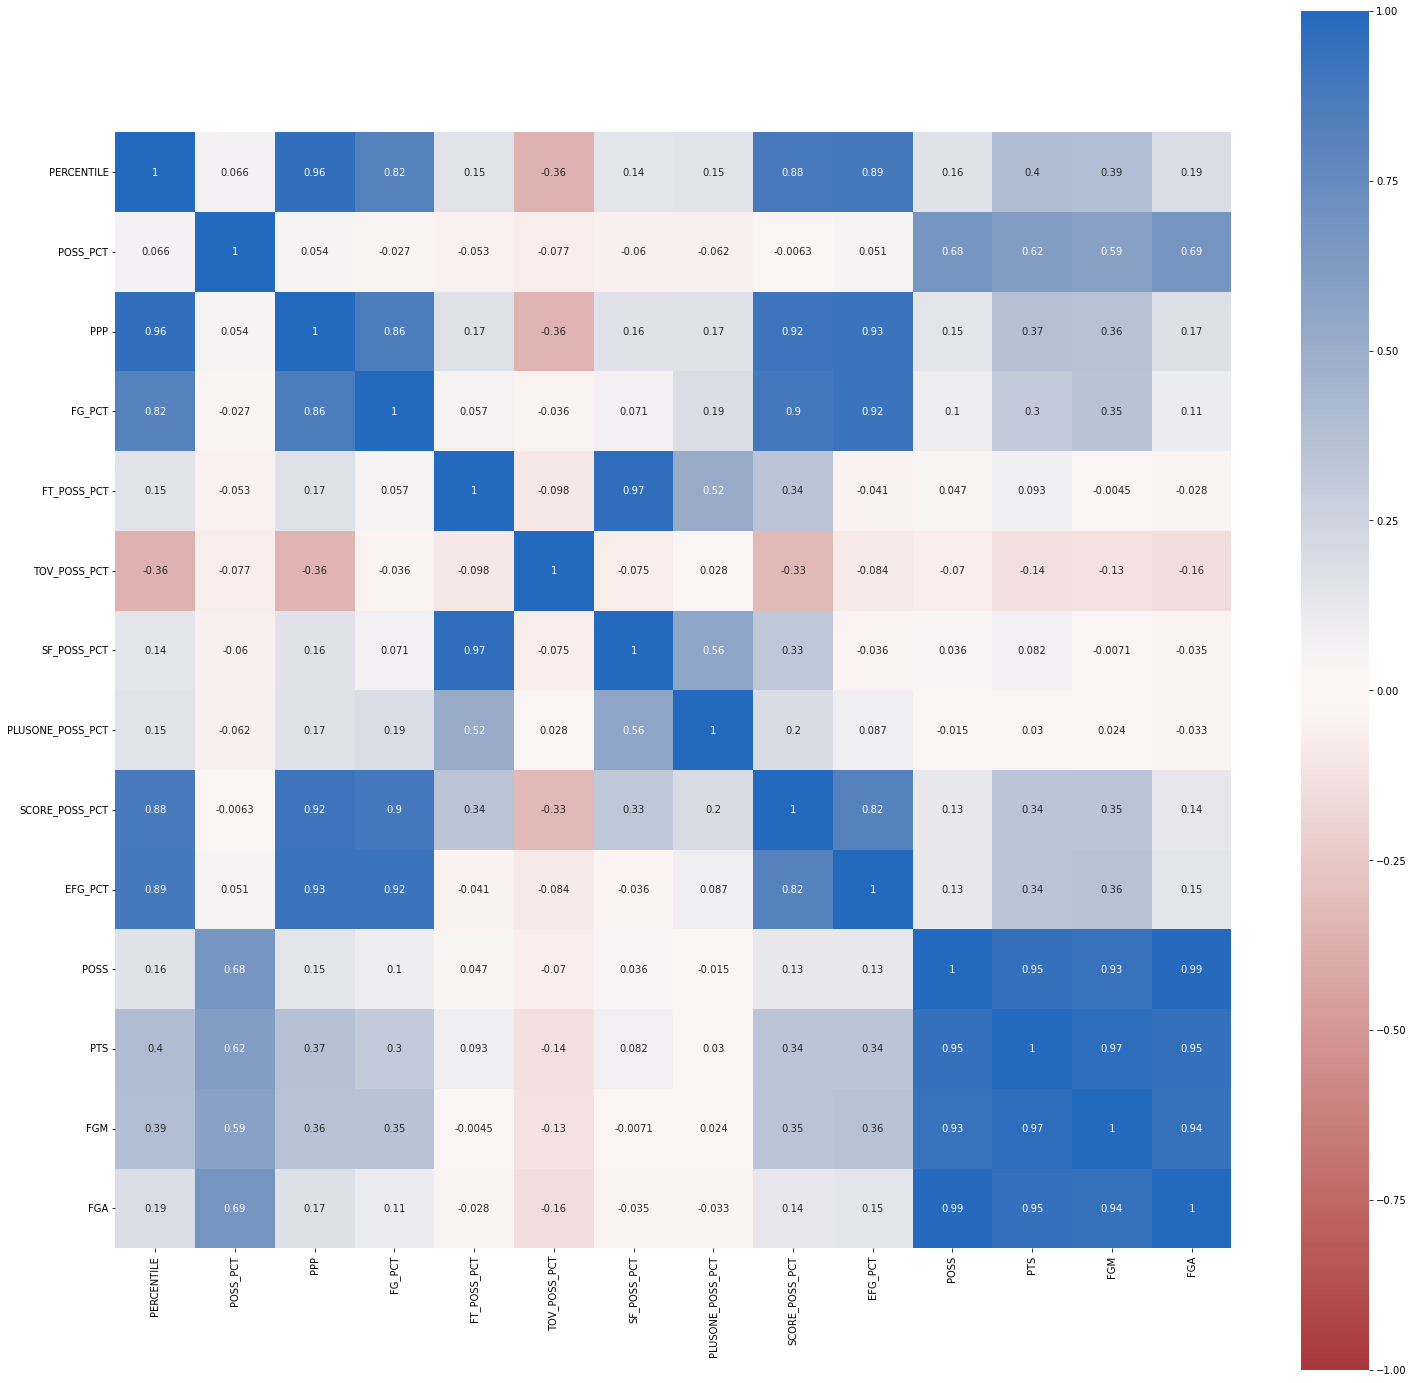

In [49]:
playtype_handoff_corr = playtype_handoff.corr()
plt.figure(figsize=(25,25))
sns.heatmap(playtype_handoff_corr, vmin=-1, vmax=1,center=0, cmap='vlag_r', square=True, annot=True)

In [50]:
playtype_handoff.drop(['PERCENTILE', 'POSS_PCT','FT_POSS_PCT', 'TOV_POSS_PCT', 'SF_POSS_PCT',
       'PLUSONE_POSS_PCT', 'SCORE_POSS_PCT', 'EFG_PCT', 'PTS', 'FGM', 'FGA'], axis=1, inplace=True)

In [51]:
playtype_handoff.rename({
    'PPP': 'HANDOFF_PPP',
    'FG_PCT': 'HANDOFF_FG%',
    'POSS': 'HANDOFF_POSS'
}, axis=1, inplace=True)

In [52]:
# playtype_cut df
playtype_cut = dfs[16]
playtype_cut.drop(['Unnamed: 0', 'SEASON_ID', 'PLAYER_ID', 'TEAM_ID', 'TEAM_NAME', 
                    'GP', 'PLAY_TYPE', 'TYPE_GROUPING','FGMX'], axis=1, inplace=True)
playtype_cut

,PLAYER_NAME,TEAM_ABBREVIATION,PERCENTILE,POSS_PCT,PPP,FG_PCT,FT_POSS_PCT,TOV_POSS_PCT,SF_POSS_PCT,PLUSONE_POSS_PCT,SCORE_POSS_PCT,EFG_PCT,POSS,PTS,FGM,FGA
0,Rudy Gobert,UTA,0.509,0.265,1.284,0.688,0.245,0.061,0.236,0.048,0.690,0.688,3.2,4.1,1.6,2.4
1,Zion Williamson,NOP,0.778,0.140,1.420,0.715,0.175,0.045,0.170,0.080,0.690,0.715,3.3,4.7,2.0,2.8
2,Bam Adebayo,MIA,0.337,0.204,1.197,0.595,0.144,0.057,0.140,0.031,0.598,0.595,3.6,4.3,1.8,3.0
3,Deandre Ayton,PHX,0.733,0.217,1.398,0.731,0.140,0.065,0.140,0.043,0.694,0.731,2.7,3.8,1.7,2.3
4,Montrezl Harrell,LAL,0.730,0.231,1.398,0.713,0.177,0.066,0.177,0.072,0.691,0.713,2.6,3.7,1.6,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,R.J. Hampton,ORL,0.038,0.031,0.800,0.500,0.000,0.200,0.000,0.000,0.400,0.500,0.4,0.3,0.2,0.3
328,Talen Horton-Tucker,LAL,0.026,0.017,0.727,0.444,0.000,0.182,0.000,0.000,0.364,0.444,0.2,0.1,0.1,0.1
329,Al-Farouq Aminu,ORL,0.009,0.100,0.667,0.333,0.250,0.083,0.250,0.083,0.333,0.333,0.7,0.5,0.2,0.5
330,LaMelo Ball,CHA,0.003,0.016,0.571,0.333,0.000,0.143,0.000,0.000,0.286,0.333,0.3,0.2,0.1,0.2


<AxesSubplot:>

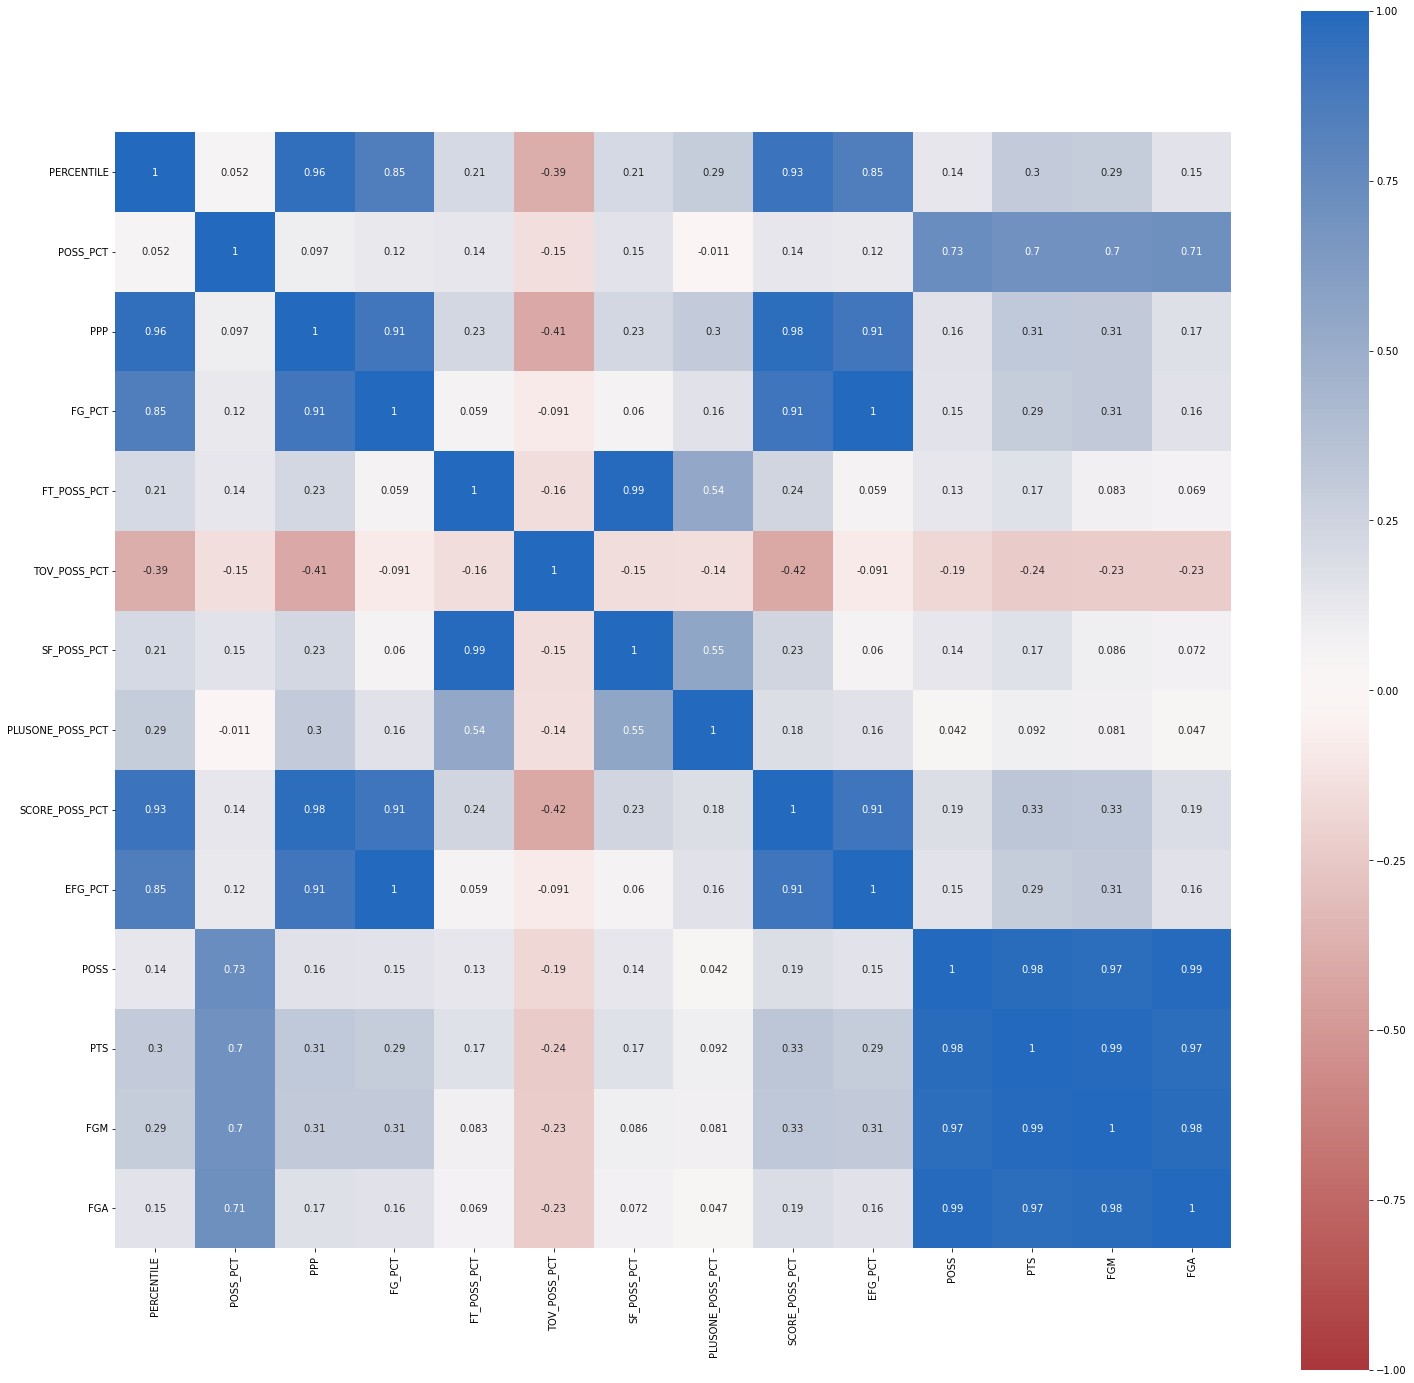

In [53]:
playtype_cut_corr = playtype_cut.corr()
plt.figure(figsize=(25,25))
sns.heatmap(playtype_cut_corr, vmin=-1, vmax=1,center=0, cmap='vlag_r', square=True, annot=True)

In [54]:
playtype_cut.drop(['PERCENTILE', 'POSS_PCT','FT_POSS_PCT', 'TOV_POSS_PCT', 'SF_POSS_PCT',
       'PLUSONE_POSS_PCT', 'SCORE_POSS_PCT', 'EFG_PCT', 'PTS', 'FGM', 'FGA'], axis=1, inplace=True)

In [55]:
playtype_cut.rename({
    'PPP': 'CUT_PPP',
    'FG_PCT': 'CUT_FG%',
    'POSS': 'CUT_POSS'
}, axis=1, inplace=True)

In [56]:
# playtype_off_screen df
playtype_off_screen = dfs[17]
playtype_off_screen.drop(['Unnamed: 0', 'SEASON_ID', 'PLAYER_ID', 'TEAM_ID', 'TEAM_NAME', 
                            'GP', 'PLAY_TYPE', 'TYPE_GROUPING','FGMX'], axis=1, inplace=True)
playtype_off_screen

,PLAYER_NAME,TEAM_ABBREVIATION,PERCENTILE,POSS_PCT,PPP,FG_PCT,FT_POSS_PCT,TOV_POSS_PCT,SF_POSS_PCT,PLUSONE_POSS_PCT,SCORE_POSS_PCT,EFG_PCT,POSS,PTS,FGM,FGA
0,Stephen Curry,GSW,0.624,0.158,1.048,0.402,0.066,0.077,0.066,0.018,0.399,0.540,4.3,4.5,1.5,3.8
1,Bradley Beal,WAS,0.670,0.136,1.089,0.444,0.152,0.055,0.135,0.034,0.485,0.513,4.0,4.3,1.5,3.3
2,Devin Booker,PHX,0.510,0.112,0.978,0.466,0.054,0.092,0.054,0.022,0.440,0.512,2.7,2.7,1.1,2.4
3,Buddy Hield,SAC,0.405,0.169,0.918,0.335,0.010,0.041,0.005,0.000,0.328,0.470,2.7,2.5,0.9,2.6
4,Duncan Robinson,MIA,0.881,0.167,1.299,0.469,0.036,0.036,0.036,0.022,0.460,0.662,1.9,2.5,0.8,1.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,Garrett Temple,CHI,0.014,0.033,0.400,0.182,0.067,0.200,0.000,0.000,0.200,0.227,0.3,0.1,0.0,0.2
201,Tyler Johnson,BKN,0.033,0.053,0.455,0.200,0.000,0.091,0.000,0.000,0.182,0.250,0.3,0.1,0.1,0.3
202,Cole Anthony,ORL,0.005,0.014,0.200,0.100,0.000,0.000,0.000,0.000,0.100,0.100,0.2,0.0,0.0,0.2
203,James Harden,BKN,0.005,0.012,0.200,0.111,0.000,0.100,0.000,0.000,0.100,0.111,0.3,0.1,0.0,0.3


<AxesSubplot:>

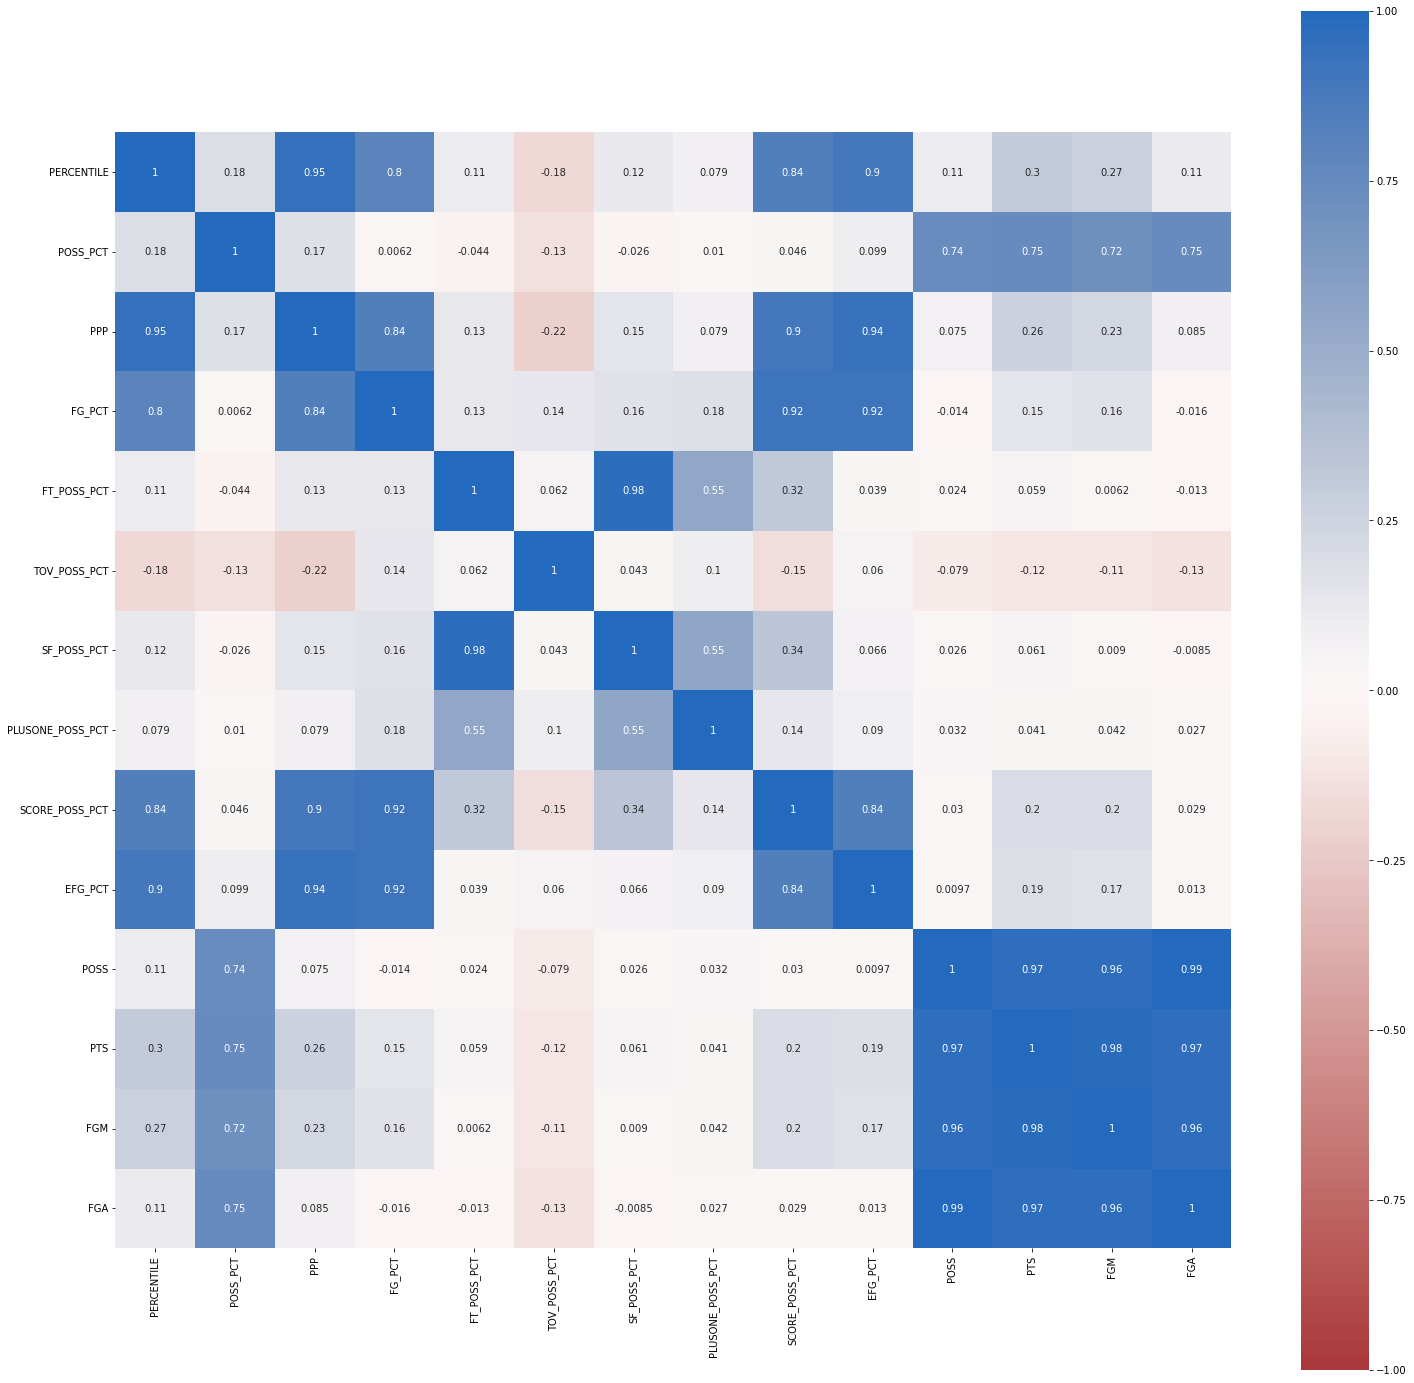

In [57]:
playtype_off_screen_corr = playtype_off_screen.corr()
plt.figure(figsize=(25,25))
sns.heatmap(playtype_off_screen_corr, vmin=-1, vmax=1,center=0, cmap='vlag_r', square=True, annot=True)

In [58]:
playtype_off_screen.drop(['PERCENTILE', 'POSS_PCT','FT_POSS_PCT', 'TOV_POSS_PCT', 'SF_POSS_PCT',
       'PLUSONE_POSS_PCT', 'SCORE_POSS_PCT', 'EFG_PCT', 'PTS', 'FGM', 'FGA'], axis=1, inplace=True)

In [59]:
playtype_off_screen.rename({
    'PPP': 'OFF_SCREEN_PPP',
    'FG_PCT': 'OFF_SCREEN_FG%',
    'POSS': 'OFF_SCREEN_POSS'
}, axis=1, inplace=True)

In [60]:
# playtype_putback df
playtype_putback = dfs[18]
playtype_putback.drop(['Unnamed: 0', 'SEASON_ID', 'PLAYER_ID', 'TEAM_ID', 'TEAM_NAME',
                        'GP', 'PLAY_TYPE', 'TYPE_GROUPING','FGMX'], axis=1, inplace=True)
playtype_putback

,PLAYER_NAME,TEAM_ABBREVIATION,PERCENTILE,POSS_PCT,PPP,FG_PCT,FT_POSS_PCT,TOV_POSS_PCT,SF_POSS_PCT,PLUSONE_POSS_PCT,SCORE_POSS_PCT,EFG_PCT,POSS,PTS,FGM,FGA
0,Enes Freedom,POR,0.643,0.342,1.177,0.596,0.128,0.049,0.119,0.033,0.597,0.596,3.4,4.0,1.7,2.9
1,Jonas Valanciunas,MEM,0.777,0.224,1.268,0.644,0.124,0.038,0.124,0.024,0.636,0.644,3.4,4.3,1.9,2.9
2,Clint Capela,ATL,0.519,0.273,1.105,0.565,0.109,0.034,0.101,0.042,0.563,0.565,3.8,4.2,1.9,3.4
3,Nikola Jokic,DEN,0.880,0.096,1.346,0.649,0.093,0.012,0.086,0.019,0.667,0.649,2.3,3.0,1.3,2.1
4,Rudy Gobert,UTA,0.808,0.192,1.289,0.672,0.205,0.072,0.199,0.048,0.663,0.672,2.3,3.0,1.2,1.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,Taurean Prince,CLE,0.017,0.039,0.667,0.333,0.000,0.000,0.000,0.000,0.333,0.333,0.4,0.3,0.1,0.4
276,T.J. McConnell,IND,0.017,0.019,0.667,0.444,0.000,0.250,0.000,0.000,0.333,0.444,0.2,0.1,0.1,0.1
277,Garrett Temple,CHI,0.041,0.022,0.700,0.333,0.100,0.100,0.100,0.100,0.300,0.333,0.2,0.1,0.1,0.2
278,Naji Marshall,NOP,0.007,0.043,0.583,0.333,0.083,0.167,0.083,0.000,0.333,0.333,0.4,0.2,0.1,0.3


<AxesSubplot:>

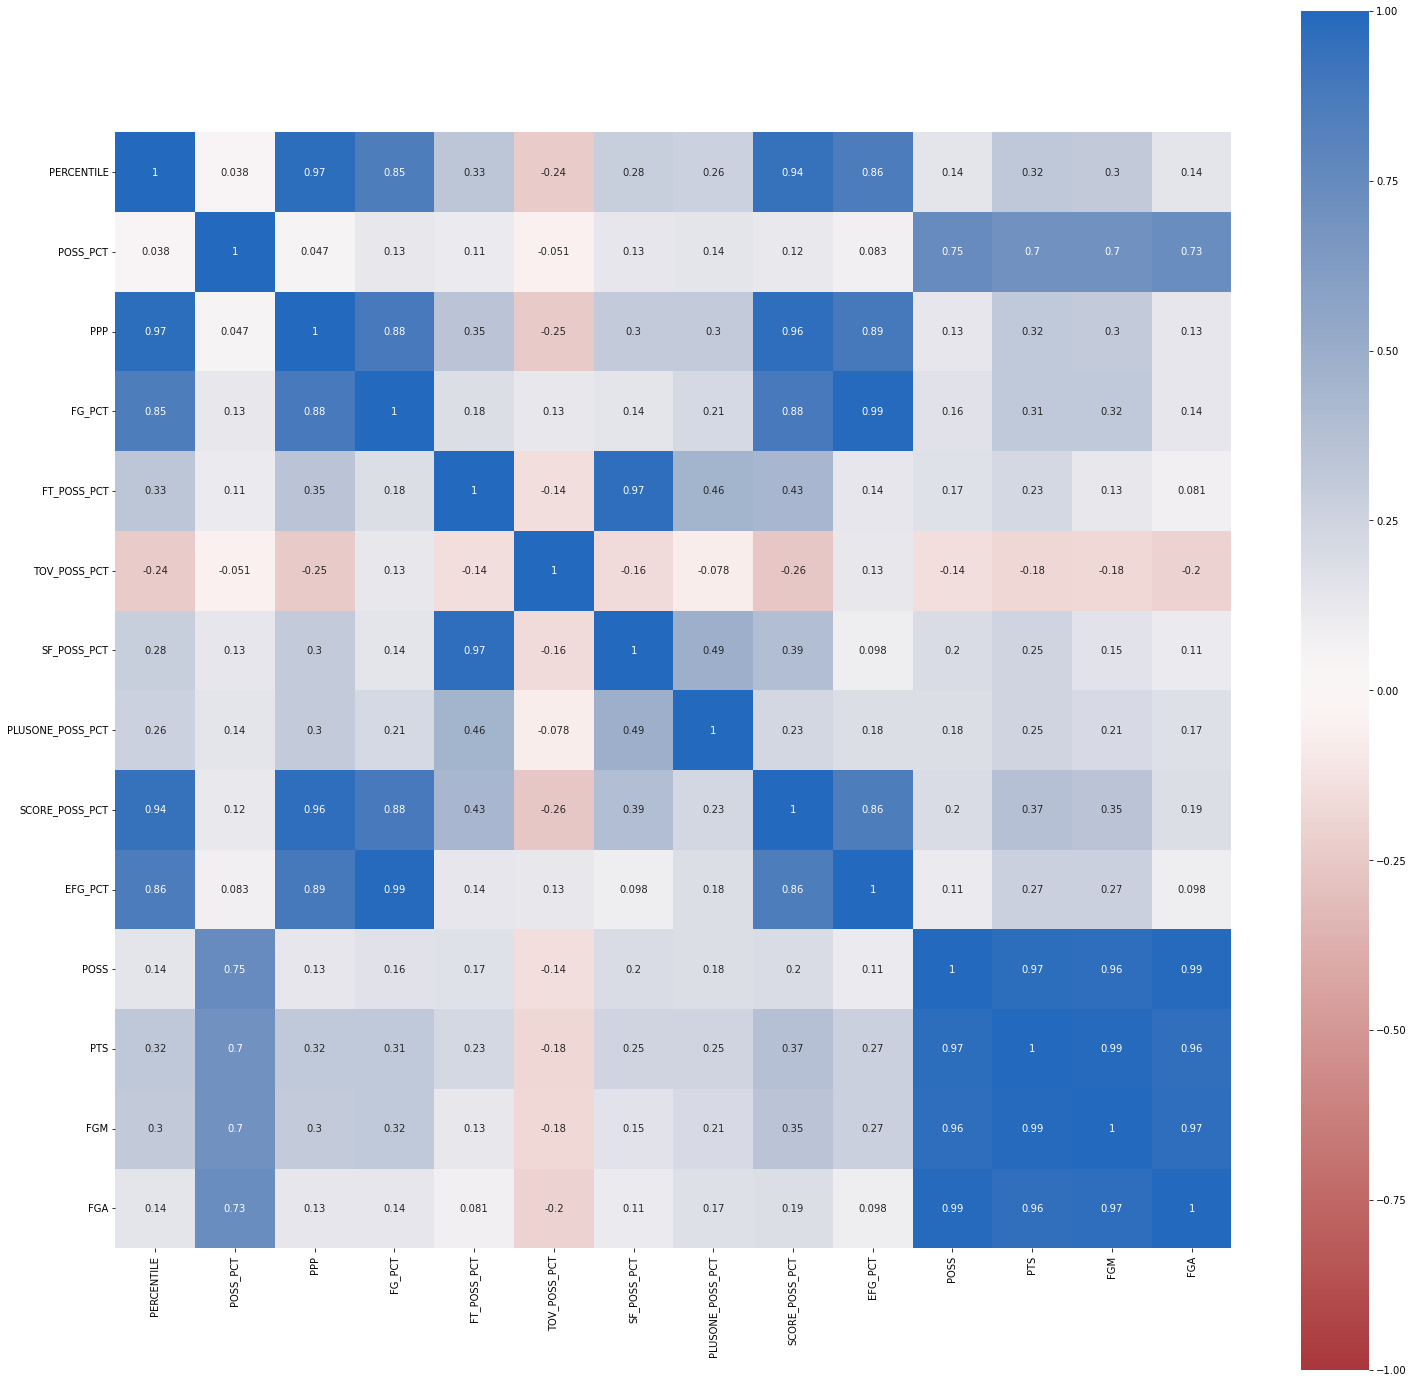

In [61]:
playtype_putback_corr = playtype_putback.corr()
plt.figure(figsize=(25,25))
sns.heatmap(playtype_putback_corr, vmin=-1, vmax=1,center=0, cmap='vlag_r', square=True, annot=True)


In [62]:
playtype_putback.drop(['PERCENTILE', 'POSS_PCT','FT_POSS_PCT', 'TOV_POSS_PCT', 'SF_POSS_PCT',
       'PLUSONE_POSS_PCT', 'SCORE_POSS_PCT', 'EFG_PCT', 'PTS', 'FGM', 'FGA'], axis=1, inplace=True)

In [63]:
playtype_putback.rename({
    'PPP': 'PUTBACK_PPP',
    'FG_PCT': 'PUTBACK_FG%',
    'POSS': 'PUTBACK_POSS'
}, axis=1, inplace=True)

In [64]:
# merging all playtypes to have a comprehensive overview of players' playstyle

playtype = playtype_isolation.merge(playtype_pnr_ball_handler, how='outer')
playtype = playtype.merge(playtype_pnr_roll_man, how='outer')
playtype = playtype.merge(playtype_transition, how='outer')
playtype = playtype.merge(playtype_post_up, how='outer')
playtype = playtype.merge(playtype_spot_up, how='outer')
playtype = playtype.merge(playtype_handoff, how='outer')
playtype = playtype.merge(playtype_cut, how='outer')
playtype = playtype.merge(playtype_off_screen, how='outer')
playtype = playtype.merge(playtype_putback, how='outer')

playtype.fillna(0, inplace=True)
playtype

,PLAYER_NAME,TEAM_ABBREVIATION,ISO_PPP,ISO_FG%,ISO_POSS,PNR_HANDLER_PPP,PNR_HANDLER_FG%,PNR_HANDLER_POSS,PNR_ROLLMAN_PPP,PNR_ROLLMAN_FG%,...,HANDOFF_POSS,CUT_PPP,CUT_FG%,CUT_POSS,OFF_SCREEN_PPP,OFF_SCREEN_FG%,OFF_SCREEN_POSS,PUTBACK_PPP,PUTBACK_FG%,PUTBACK_POSS
0,Damian Lillard,POR,1.106,0.442,4.9,1.073,0.443,12.0,0.000,0.000,...,2.0,1.491,0.766,0.8,1.116,0.431,1.0,1.000,0.417,0.2
1,Julius Randle,NYK,0.901,0.420,5.5,0.886,0.420,1.5,1.127,0.496,...,0.4,1.133,0.538,0.4,0.857,0.355,1.0,1.264,0.556,0.7
2,Russell Westbrook,WAS,0.783,0.395,6.4,0.713,0.363,5.3,0.000,0.000,...,0.5,1.261,0.650,0.4,0.000,0.000,0.0,1.021,0.550,0.7
3,Luka Doncic,DAL,1.046,0.463,4.6,1.006,0.491,13.2,0.000,0.000,...,1.4,1.250,0.667,0.2,1.152,0.452,0.7,1.146,0.516,0.6
4,James Harden,BKN,1.091,0.435,8.0,0.915,0.457,8.2,0.000,0.000,...,1.3,0.000,0.000,0.0,0.200,0.111,0.3,1.000,0.667,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,JJ Redick,DAL,0.000,0.000,0.0,0.000,0.000,0.0,0.000,0.000,...,1.1,0.000,0.000,0.0,0.810,0.333,1.6,0.000,0.000,0.0
493,Cameron Oliver,HOU,0.000,0.000,0.0,0.000,0.000,0.0,0.000,0.000,...,0.0,0.000,0.000,0.0,0.000,0.000,0.0,0.000,0.000,0.0
494,Dante Exum,CLE,0.000,0.000,0.0,0.000,0.000,0.0,0.000,0.000,...,0.0,0.000,0.000,0.0,0.000,0.000,0.0,0.000,0.000,0.0
495,Damian Jones,LAL,0.000,0.000,0.0,0.000,0.000,0.0,0.000,0.000,...,0.0,1.900,1.000,1.3,0.000,0.000,0.0,0.000,0.000,0.0


<AxesSubplot:>

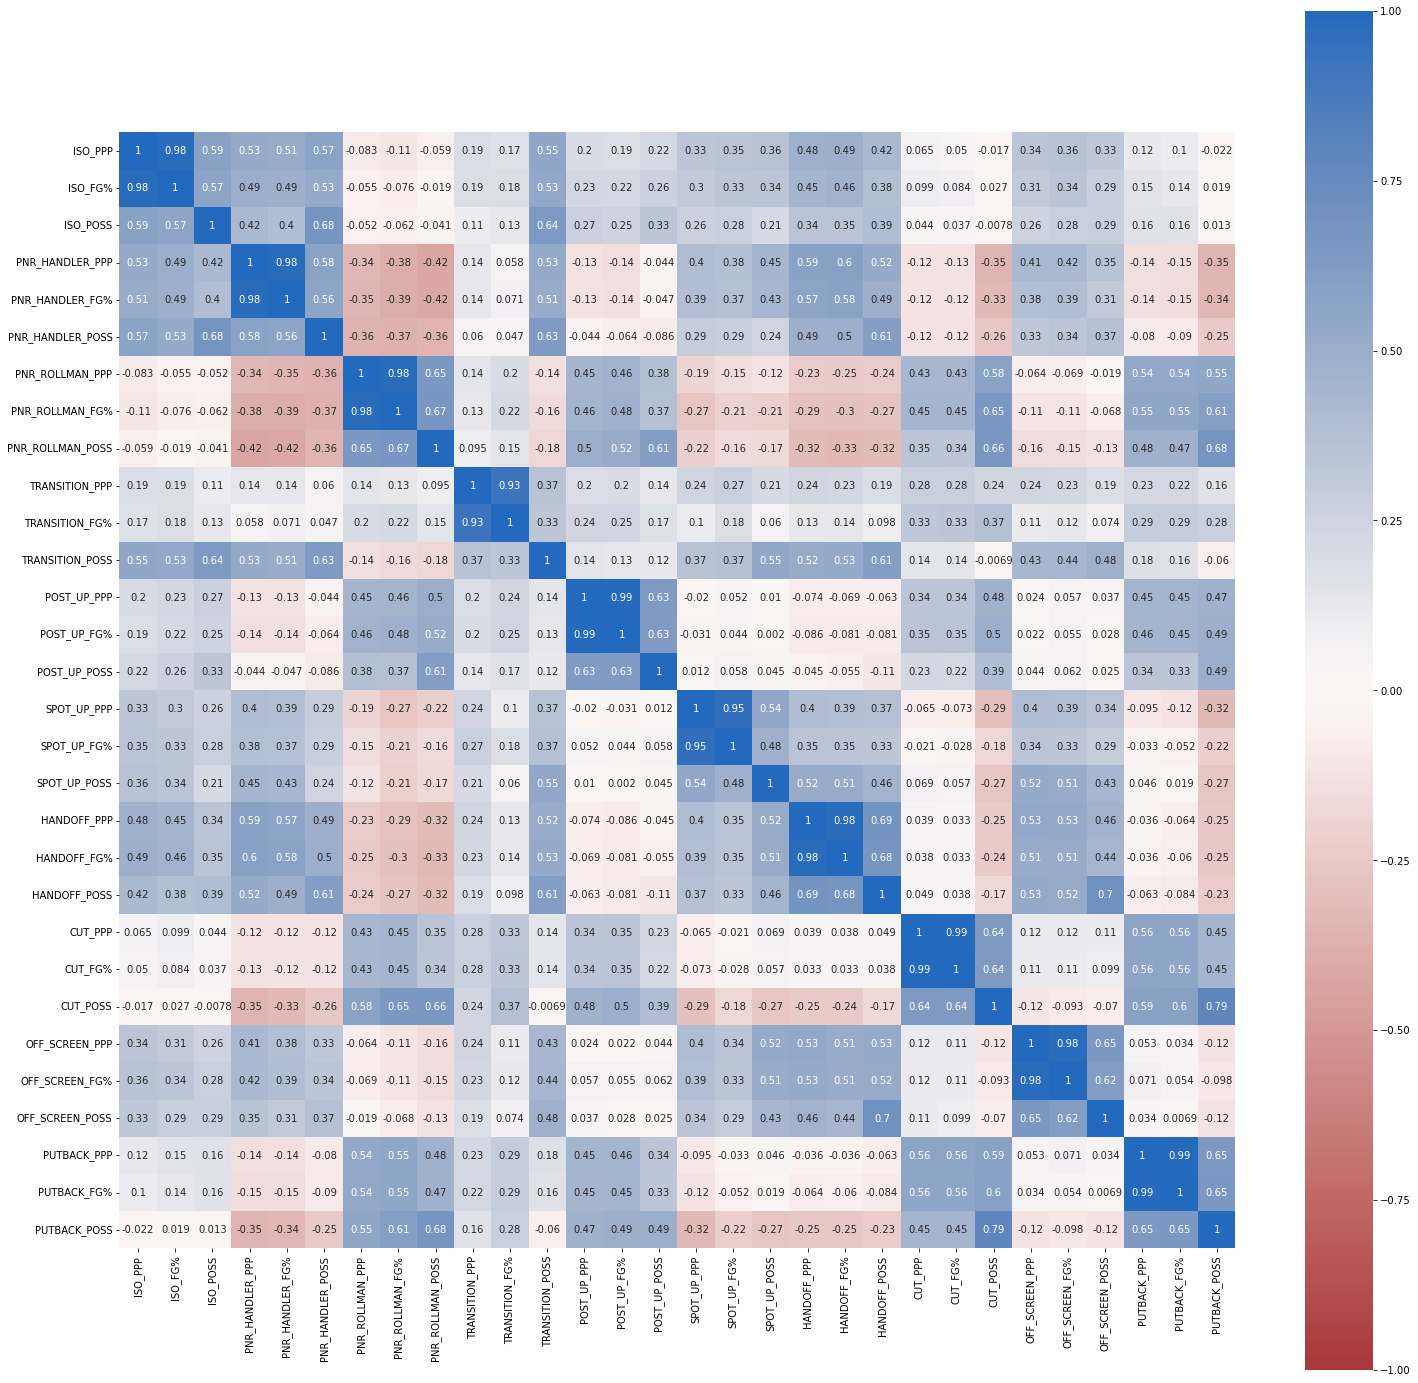

In [65]:
playtype_corr = playtype.corr()
plt.figure(figsize=(25,25))
sns.heatmap(playtype_corr, vmin=-1, vmax=1,center=0, cmap='vlag_r', square=True, annot=True)

In [66]:
# tracking_passing df
tracking_passing = dfs[19]
tracking_passing.drop(['Unnamed: 0', 'PLAYER_ID', 'TEAM_ID', 'GP', 'W', 'L', 'MIN', 'FT_AST'], axis=1, inplace=True)
tracking_passing

,PLAYER_NAME,TEAM_ABBREVIATION,PASSES_MADE,PASSES_RECEIVED,AST,SECONDARY_AST,POTENTIAL_AST,AST_POINTS_CREATED,AST_ADJ,AST_TO_PASS_PCT,AST_TO_PASS_PCT_ADJ
0,Aaron Gordon,DEN,32.9,34.0,3.2,0.6,5.7,8.1,4.0,0.098,0.123
1,Aaron Holiday,IND,15.5,20.5,1.9,0.3,3.3,5.0,2.4,0.121,0.158
2,Aaron Nesmith,BOS,11.7,9.0,0.5,0.1,1.0,1.2,0.6,0.043,0.052
3,Abdel Nader,PHX,9.4,11.3,0.8,0.0,1.1,2.1,0.9,0.084,0.097
4,Adam Mokoka,CHI,2.4,3.1,0.4,0.1,0.6,0.9,0.4,0.152,0.182
...,...,...,...,...,...,...,...,...,...,...,...
535,Yogi Ferrell,LAC,17.6,21.4,2.2,0.4,3.5,5.1,2.6,0.125,0.148
536,Yuta Watanabe,TOR,14.4,10.9,0.8,0.2,1.6,2.0,1.1,0.056,0.074
537,Zach LaVine,CHI,40.1,56.6,4.9,0.9,9.8,12.6,6.3,0.121,0.158
538,Zeke Nnaji,DEN,6.6,5.9,0.2,0.0,0.4,0.5,0.3,0.036,0.043


<AxesSubplot:>

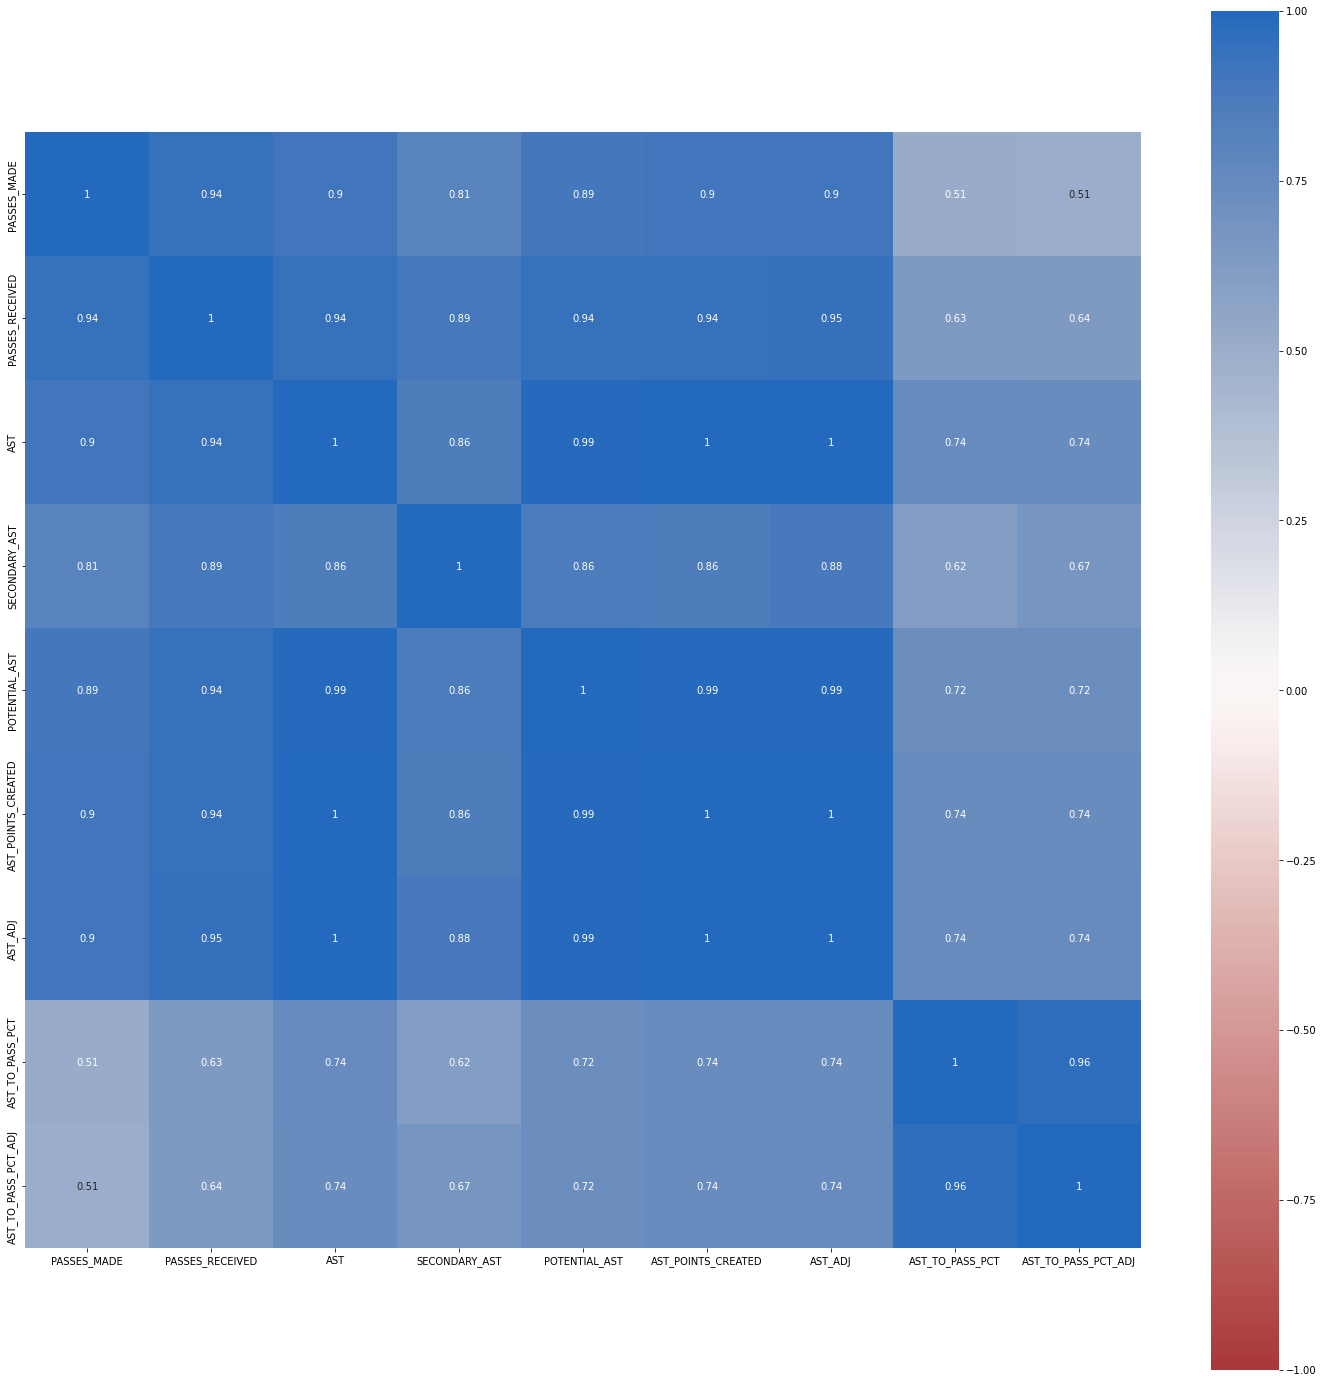

In [67]:
tracking_passing_corr = tracking_passing.corr()
plt.figure(figsize=(25,25))
sns.heatmap(tracking_passing_corr, vmin=-1, vmax=1,center=0, cmap='vlag_r', square=True, annot=True)

In [68]:
tracking_passing.drop(['PASSES_RECEIVED', 'AST','AST_POINTS_CREATED', 'AST_ADJ','AST_TO_PASS_PCT_ADJ'], axis=1, inplace=True)

In [69]:
general_traditional.head()

,PLAYER_NAME,TEAM_ABBREVIATION,FG_PCT,FG3_PCT,OREB,DREB,AST,STL,BLK,PF,PTS,PLUS_MINUS
0,Aaron Gordon,DEN,0.463,0.335,1.5,4.1,3.2,0.7,0.7,1.8,12.4,1.2
1,Aaron Holiday,IND,0.390,0.368,0.2,1.1,1.9,0.7,0.2,1.4,7.2,0.0
2,Aaron Nesmith,BOS,0.438,0.370,0.6,2.2,0.5,0.3,0.2,1.9,4.7,-0.2
3,Abdel Nader,PHX,0.491,0.419,0.3,2.3,0.8,0.4,0.4,1.4,6.7,1.2
4,Al Horford,BOS,0.450,0.368,1.0,5.7,3.4,0.9,0.9,1.7,14.2,-3.6


In [70]:
general_advanced.head()

,PLAYER_NAME,TEAM_ABBREVIATION,AST_PCT,AST_TO,OREB_PCT,DREB_PCT,TM_TOV_PCT,TS_PCT,USG_PCT,PIE
0,Aaron Gordon,DEN,0.165,1.66,0.055,0.150,11.8,0.547,0.204,0.095
1,Aaron Holiday,IND,0.139,1.86,0.012,0.060,9.9,0.503,0.189,0.057
2,Aaron Nesmith,BOS,0.047,1.00,0.041,0.146,9.7,0.573,0.133,0.060
3,Abdel Nader,PHX,0.078,1.00,0.020,0.151,11.2,0.605,0.183,0.092
4,Adam Mokoka,CHI,0.179,1.00,0.017,0.077,17.2,0.386,0.171,0.025


In [71]:
defense_dashboard.head()

,PLAYER_NAME,TEAM_ABBREVIATION,PLAYER_POSITION,LT6FT_FREQ,LT6FT_DFGM,LT6FT_%DIFF,3PT_FREQ,3PT_DFGM,3PT_%DIFF,BT6_9FT_DFGM,BT6_9FT_%DIFF,BT6_9FT_FREQ,BT10_15FT_DFGM,BT10_15FT_%DIFF,BT10_15FT_FREQ,BT16FT_3PT_DFGM,BT16FT_3PT_%DIFF,BT16FT_3PT_FREQ
0,Rudy Gobert,UTA,C,0.373,4.10,-0.136,0.218,1.44,-0.068,0.96,-0.177,0.115,1.28,-0.097,0.139,1.43,0.020,0.156
1,Brook Lopez,MIL,C,0.346,3.48,-0.117,0.252,1.90,0.022,0.66,-0.146,0.084,1.54,-0.035,0.164,1.38,0.064,0.154
2,Domantas Sabonis,IND,F-C,0.477,4.85,-0.064,0.218,1.39,-0.018,0.94,-0.086,0.112,0.72,-0.062,0.091,0.64,-0.039,0.101
3,Nikola Jokic,DEN,C,0.428,4.72,-0.016,0.222,1.42,-0.008,0.70,-0.152,0.099,1.10,-0.042,0.130,0.88,0.014,0.121
4,Myles Turner,IND,C-F,0.502,4.48,-0.124,0.220,1.59,0.040,0.65,-0.159,0.094,0.68,-0.103,0.092,0.67,0.016,0.092


In [72]:
hustle.head()

,PLAYER_NAME,TEAM_ABBREVIATION,CONTESTED_SHOTS_2PT,CONTESTED_SHOTS_3PT,DEFLECTIONS,CHARGES_DRAWN,SCREEN_ASSISTS,OFF_LOOSE_BALLS_RECOVERED,DEF_LOOSE_BALLS_RECOVERED
0,Aaron Gordon,DEN,2.46,1.32,1.02,0.00,0.52,0.42,0.22
1,Aaron Holiday,IND,1.29,1.80,1.47,0.00,0.03,0.17,0.23
2,Aaron Nesmith,BOS,1.83,1.04,0.52,0.02,0.13,0.33,0.24
3,Abdel Nader,PHX,1.92,1.25,0.75,0.00,0.04,0.17,0.21
4,Adam Mokoka,CHI,0.21,0.07,0.29,0.00,0.00,0.07,0.00


In [73]:
shooting.head()

,PLAYER_NAME,TEAM_ABBREVIATION,LT_5FT_FGM,LT_5FT_FG%,BT5_9FT_FGM,BT5_9FT_FG%,BT10_14FT_FGM,BT10_14FT_FG%,BT15_19FT_FGM,BT15_19FT_FG%,BT20_24FT_FGM,BT20_24FT_FG%,BT25_29FT_FGM,BT25_29FT_FG%
0,Aaron Gordon,DEN,2.2,0.631,0.4,0.447,0.5,0.455,0.3,0.361,0.5,0.348,0.7,0.330
1,Aaron Holiday,IND,1.0,0.426,0.3,0.333,0.2,0.367,0.2,0.550,0.3,0.407,0.7,0.341
2,Aaron Nesmith,BOS,0.6,0.617,0.1,0.333,0.1,0.444,0.0,1.000,0.5,0.339,0.4,0.413
3,Abdel Nader,PHX,1.3,0.564,0.3,0.583,0.0,0.250,0.0,0.000,0.4,0.444,0.4,0.400
4,Adam Mokoka,CHI,0.5,0.667,0.0,0.000,0.0,0.000,0.0,0.000,0.1,0.143,0.0,0.000


In [74]:
playtype.head()

,PLAYER_NAME,TEAM_ABBREVIATION,ISO_PPP,ISO_FG%,ISO_POSS,PNR_HANDLER_PPP,PNR_HANDLER_FG%,PNR_HANDLER_POSS,PNR_ROLLMAN_PPP,PNR_ROLLMAN_FG%,...,HANDOFF_POSS,CUT_PPP,CUT_FG%,CUT_POSS,OFF_SCREEN_PPP,OFF_SCREEN_FG%,OFF_SCREEN_POSS,PUTBACK_PPP,PUTBACK_FG%,PUTBACK_POSS
0,Damian Lillard,POR,1.106,0.442,4.9,1.073,0.443,12.0,0.000,0.000,...,2.0,1.491,0.766,0.8,1.116,0.431,1.0,1.000,0.417,0.2
1,Julius Randle,NYK,0.901,0.420,5.5,0.886,0.420,1.5,1.127,0.496,...,0.4,1.133,0.538,0.4,0.857,0.355,1.0,1.264,0.556,0.7
2,Russell Westbrook,WAS,0.783,0.395,6.4,0.713,0.363,5.3,0.000,0.000,...,0.5,1.261,0.650,0.4,0.000,0.000,0.0,1.021,0.550,0.7
3,Luka Doncic,DAL,1.046,0.463,4.6,1.006,0.491,13.2,0.000,0.000,...,1.4,1.250,0.667,0.2,1.152,0.452,0.7,1.146,0.516,0.6
4,James Harden,BKN,1.091,0.435,8.0,0.915,0.457,8.2,0.000,0.000,...,1.3,0.000,0.000,0.0,0.200,0.111,0.3,1.000,0.667,0.3


In [75]:
tracking_passing.head()

,PLAYER_NAME,TEAM_ABBREVIATION,PASSES_MADE,SECONDARY_AST,POTENTIAL_AST,AST_TO_PASS_PCT
0,Aaron Gordon,DEN,32.9,0.6,5.7,0.098
1,Aaron Holiday,IND,15.5,0.3,3.3,0.121
2,Aaron Nesmith,BOS,11.7,0.1,1.0,0.043
3,Abdel Nader,PHX,9.4,0.0,1.1,0.084
4,Adam Mokoka,CHI,2.4,0.1,0.6,0.152


In [76]:
# finally we merge all dataframes into one big dashboard for every player
# followed by some renaming and tidy up work

players_dashboard = general_traditional.merge(general_advanced)
players_dashboard = players_dashboard.merge(defense_dashboard, how='left')
players_dashboard = players_dashboard.merge(hustle, how='left')
players_dashboard = players_dashboard.merge(shooting, how='left')
players_dashboard = players_dashboard.merge(playtype, how='left')
players_dashboard = players_dashboard.merge(tracking_passing)

players_dashboard.fillna(0, inplace=True)
print(players_dashboard.columns)
players_dashboard



Index(['PLAYER_NAME', 'TEAM_ABBREVIATION', 'FG_PCT', 'FG3_PCT', 'OREB', 'DREB',
       'AST', 'STL', 'BLK', 'PF', 'PTS', 'PLUS_MINUS', 'AST_PCT', 'AST_TO',
       'OREB_PCT', 'DREB_PCT', 'TM_TOV_PCT', 'TS_PCT', 'USG_PCT', 'PIE',
       'PLAYER_POSITION', 'LT6FT_FREQ', 'LT6FT_DFGM', 'LT6FT_%DIFF',
       '3PT_FREQ', '3PT_DFGM', '3PT_%DIFF', 'BT6_9FT_DFGM', 'BT6_9FT_%DIFF',
       'BT6_9FT_FREQ', 'BT10_15FT_DFGM', 'BT10_15FT_%DIFF', 'BT10_15FT_FREQ',
       'BT16FT_3PT_DFGM', 'BT16FT_3PT_%DIFF', 'BT16FT_3PT_FREQ',
       'CONTESTED_SHOTS_2PT', 'CONTESTED_SHOTS_3PT', 'DEFLECTIONS',
       'CHARGES_DRAWN', 'SCREEN_ASSISTS', 'OFF_LOOSE_BALLS_RECOVERED',
       'DEF_LOOSE_BALLS_RECOVERED', 'LT_5FT_FGM', 'LT_5FT_FG%', 'BT5_9FT_FGM',
       'BT5_9FT_FG%', 'BT10_14FT_FGM', 'BT10_14FT_FG%', 'BT15_19FT_FGM',
       'BT15_19FT_FG%', 'BT20_24FT_FGM', 'BT20_24FT_FG%', 'BT25_29FT_FGM',
       'BT25_29FT_FG%', 'ISO_PPP', 'ISO_FG%', 'ISO_POSS', 'PNR_HANDLER_PPP',
       'PNR_HANDLER_FG%', 'PNR_HANDLER_

,PLAYER_NAME,TEAM_ABBREVIATION,FG_PCT,FG3_PCT,OREB,DREB,AST,STL,BLK,PF,...,OFF_SCREEN_PPP,OFF_SCREEN_FG%,OFF_SCREEN_POSS,PUTBACK_PPP,PUTBACK_FG%,PUTBACK_POSS,PASSES_MADE,SECONDARY_AST,POTENTIAL_AST,AST_TO_PASS_PCT
0,Aaron Gordon,DEN,0.463,0.335,1.5,4.1,3.2,0.7,0.7,1.8,...,0.000,0.000,0.0,1.182,0.647,0.9,32.9,0.6,5.7,0.098
1,Aaron Holiday,IND,0.390,0.368,0.2,1.1,1.9,0.7,0.2,1.4,...,0.905,0.412,0.3,0.000,0.000,0.0,15.5,0.3,3.3,0.121
2,Aaron Nesmith,BOS,0.438,0.370,0.6,2.2,0.5,0.3,0.2,1.9,...,1.471,0.563,0.4,1.200,0.818,0.3,11.7,0.1,1.0,0.043
3,Abdel Nader,PHX,0.491,0.419,0.3,2.3,0.8,0.4,0.4,1.4,...,0.000,0.000,0.0,0.000,0.000,0.0,9.4,0.0,1.1,0.084
4,Al Horford,BOS,0.450,0.368,1.0,5.7,3.4,0.9,0.9,1.7,...,0.000,0.000,0.0,0.000,0.000,0.0,38.5,0.1,5.2,0.087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,Xavier Tillman,MEM,0.559,0.338,1.3,3.1,1.3,0.7,0.6,2.0,...,0.000,0.000,0.0,1.000,0.640,0.6,23.8,0.1,2.3,0.053
392,Yogi Ferrell,LAC,0.351,0.321,0.5,1.4,2.2,0.7,0.3,1.1,...,0.000,0.000,0.0,0.000,0.000,0.0,17.6,0.4,3.5,0.125
393,Yuta Watanabe,TOR,0.439,0.400,0.7,2.5,0.8,0.5,0.4,1.1,...,0.000,0.000,0.0,0.692,0.300,0.3,14.4,0.2,1.6,0.056
394,Zach LaVine,CHI,0.507,0.419,0.6,4.4,4.9,0.8,0.5,2.4,...,1.077,0.449,1.3,1.130,0.556,0.4,40.1,0.9,9.8,0.121


In [77]:
# final tidy up and eport to a pickle file and excel csv

players_dashboard.rename(
    {
        'TEAM_ABBREVIATION': 'TEAM',
        'FG_PCT': 'FG%',
        'FG3_PCT': 'FG3%',
        'FT_PCT': 'FT%',
        'AST_PCT': 'AST%',
        'OREB_PCT': 'OREB%', 
        'DREB_PCT': 'DREB%', 
        'TM_TOV_PCT': 'TM_TOV%', 
        'TS_PCT': 'TS%', 
        'USG_PCT': 'USG%',
        'AST_TO_PASS_PCT': 'AST_TO_PASS%'
    },
    axis=1, inplace=True
)

players_dashboard.to_csv('players_dashboard.csv')
players_dashboard.to_pickle('players_dashboard.pkl')